<a href="https://colab.research.google.com/github/Erfan-Mostafiz/Mental-Health-of-students-after-reopening-of-education-institutes/blob/main/CSE498R_Predicting_Anxiety_Depression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing / Installing packages

In [ ]:
import math #mathematical computation
import pandas as pd #dataframe
import numpy as np #mathematical computations
import matplotlib.pyplot as plt #visualization
import matplotlib
import joblib #saving the model
import seaborn as sns #visualization
import json #exporting columns
import pickle #saving the model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.linear_model import Lasso #Lasso Regression
from sklearn.tree import DecisionTreeRegressor #Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor #Random Forest Regression
from xgboost import XGBRegressor # XGBoost Regression
from sklearn.model_selection import train_test_split #Splitting the dataset into training and testing
from sklearn.model_selection import ShuffleSplit #Random shuffling
from sklearn.model_selection import cross_val_score #Score cross validation
from sklearn.model_selection import cross_validate #Score cross validation
from sklearn.model_selection import GridSearchCV #Hyper parameter tuning
from statistics import stdev
from warnings import simplefilter #Filtering warnings

In [ ]:
dataset = '/content/CSE498R_Mental_Health_Dataset.csv'

In [ ]:
df1 = pd.read_csv(dataset)

In [ ]:
df1.head()

,Your Age,Your Gender,Name of your Educational Institution,Institution Type,District where you stayed when education institutions were closed for Covid19,Location of your household where you stayed when education institutions were closed for Covid19,What is your Family Income Status?,Number of bedrooms in your house?,Do you have a separate bedroom?,Were you ever infected by Covid19?,...,"Feeling afraid, as if something awful might happen",Little Interest or Pleasure in doing things,"Feeling down, depressed, or hopeless","Trouble Falling or staying asleep, or sleeping too much",Feeling tired or having little energy,Poor appetite or overeating,Feeling bad about yourself or that you are a failure or you have let your family down,"Trouble concentrating on things, such as reading, watching tv or videos, studying",Moving or speaking so slowly that other people could have noticed it. Or the opposite being so restless that you have been moving around a lot more than usual,"Thoughts that you would be better off dead, or of hurting yourself"
0,15,Female,Viqarunnisa Noon School And College,School,Dhaka,Urban,Middle class,3 bedrooms,Yes,No,...,Several Days,Not at all,Several Days,Several Days,Nearly every day,More than half the days,Not at all,Several Days,Not at all,Not at all
1,16,Female,Motijheel Govt Girls High School,School,Dhaka,Urban,Middle class,2 bedrooms,No,No,...,Several Days,Not at all,Several Days,Not at all,Not at all,Not at all,Several Days,Not at all,Not at all,Not at all
2,17,Male,Birshreshtha Munshi Abdur Rouf Public College,College,Dhaka,Urban,Prefer Not to say,2 bedrooms,Yes,No,...,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Nearly every day,Not at all,More than half the days
3,17,Male,Scholar's School and College,College,Dhaka,Urban,Upper-Middle class,3 bedrooms,Yes,Maybe,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day
4,17,Male,Noakhali Government college,College,Noakhali,Upazila,Middle class,4 bedrooms or greater,Yes,No,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day


In [ ]:
df1.columns

Index(['Your Age', 'Your Gender', 'Name of your Educational Institution',
       'Institution Type',
       'District where you stayed when education institutions were closed for Covid19',
       'Location of your household where you stayed when education institutions were closed for Covid19',
       'What is your Family Income Status?',
       'Number of bedrooms in your house?', 'Do you have a separate bedroom?',
       'Were you ever infected by Covid19?',
       'Has anyone in your family ever been infected by Covid19?  ',
       'If you or your family had been ever infected by Covid19, how much did it affect your mental health during that time? ',
       'Had any of your family members (including yourself) lost their job or business due to Covid19?',
       'With all the deaths due to Covid19 around us in general, how much did it affect your mental health?',
       'Are you a smoker?', 'Do you have any underlying medical condition? ',
       'Do any of your family members have any

In [ ]:
df1.nunique()

Your Age                                                                                                                                                          14
Your Gender                                                                                                                                                        2
Name of your Educational Institution                                                                                                                              30
Institution Type                                                                                                                                                   3
District where you stayed when education institutions were closed for Covid19                                                                                     26
Location of your household where you stayed when education institutions were closed for Covid19                                                                    4
What is yo

## Exploratory Data Analysis And Data Preprocessing 

In [ ]:
df1.columns = df1.columns.str.replace(' ','_')
df1.columns = df1.columns.str.replace(',','_')
df1.columns = df1.columns.str.replace('.','_')
df1.columns = df1.columns.str.replace('-','_')
df1.columns = df1.columns.str.replace(' -','_')
df1.columns = df1.columns.str.replace(' - ','_')
df1.columns = df1.columns.str.replace('- ','_')
df1.columns = df1.columns.str.replace('\n','_')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df1.head()

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,Feeling_afraid__as_if_something_awful_might_happen,Little_Interest_or_Pleasure_in_doing_things,Feeling_down__depressed__or_hopeless,Trouble_Falling_or_staying_asleep__or_sleeping_too_much,Feeling_tired_or_having_little_energy_,Poor_appetite_or_overeating,Feeling_bad_about_yourself_or_that_you_are_a_failure_or_you_have_let_your_family_down,Trouble_concentrating_on_things__such_as_reading__watching_tv_or_videos__studying,Moving_or_speaking_so_slowly_that_other_people_could_have_noticed_it__Or_the_opposite_being_so_restless_that_you_have_been_moving_around_a_lot_more_than_usual,Thoughts_that_you_would_be_better_off_dead__or_of_hurting_yourself
0,15,Female,Viqarunnisa Noon School And College,School,Dhaka,Urban,Middle class,3 bedrooms,Yes,No,...,Several Days,Not at all,Several Days,Several Days,Nearly every day,More than half the days,Not at all,Several Days,Not at all,Not at all
1,16,Female,Motijheel Govt Girls High School,School,Dhaka,Urban,Middle class,2 bedrooms,No,No,...,Several Days,Not at all,Several Days,Not at all,Not at all,Not at all,Several Days,Not at all,Not at all,Not at all
2,17,Male,Birshreshtha Munshi Abdur Rouf Public College,College,Dhaka,Urban,Prefer Not to say,2 bedrooms,Yes,No,...,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Nearly every day,Not at all,More than half the days
3,17,Male,Scholar's School and College,College,Dhaka,Urban,Upper-Middle class,3 bedrooms,Yes,Maybe,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day
4,17,Male,Noakhali Government college,College,Noakhali,Upazila,Middle class,4 bedrooms or greater,Yes,No,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day


In [ ]:
df2 = df1
df2.isnull().any()

Your_Age                                                                                                                                                          False
Your_Gender                                                                                                                                                       False
Name_of_your_Educational_Institution                                                                                                                              False
Institution_Type                                                                                                                                                  False
District_where_you_stayed_when_education_institutions_were_closed_for_Covid19                                                                                     False
Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19                                                                 

In [ ]:
df2.isnull().sum()

Your_Age                                                                                                                                                          0
Your_Gender                                                                                                                                                       0
Name_of_your_Educational_Institution                                                                                                                              0
Institution_Type                                                                                                                                                  0
District_where_you_stayed_when_education_institutions_were_closed_for_Covid19                                                                                     0
Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19                                                                   0
What_is_your_Fam

In [ ]:
df2 = df2.dropna(how='any',axis=0) 
df2.isnull().sum()

Your_Age                                                                                                                                                          0
Your_Gender                                                                                                                                                       0
Name_of_your_Educational_Institution                                                                                                                              0
Institution_Type                                                                                                                                                  0
District_where_you_stayed_when_education_institutions_were_closed_for_Covid19                                                                                     0
Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19                                                                   0
What_is_your_Fam

In [ ]:
df2.shape
df2.head(20)

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,Feeling_afraid__as_if_something_awful_might_happen,Little_Interest_or_Pleasure_in_doing_things,Feeling_down__depressed__or_hopeless,Trouble_Falling_or_staying_asleep__or_sleeping_too_much,Feeling_tired_or_having_little_energy_,Poor_appetite_or_overeating,Feeling_bad_about_yourself_or_that_you_are_a_failure_or_you_have_let_your_family_down,Trouble_concentrating_on_things__such_as_reading__watching_tv_or_videos__studying,Moving_or_speaking_so_slowly_that_other_people_could_have_noticed_it__Or_the_opposite_being_so_restless_that_you_have_been_moving_around_a_lot_more_than_usual,Thoughts_that_you_would_be_better_off_dead__or_of_hurting_yourself
0,15,Female,Viqarunnisa Noon School And College,School,Dhaka,Urban,Middle class,3 bedrooms,Yes,No,...,Several Days,Not at all,Several Days,Several Days,Nearly every day,More than half the days,Not at all,Several Days,Not at all,Not at all
1,16,Female,Motijheel Govt Girls High School,School,Dhaka,Urban,Middle class,2 bedrooms,No,No,...,Several Days,Not at all,Several Days,Not at all,Not at all,Not at all,Several Days,Not at all,Not at all,Not at all
2,17,Male,Birshreshtha Munshi Abdur Rouf Public College,College,Dhaka,Urban,Prefer Not to say,2 bedrooms,Yes,No,...,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Nearly every day,Not at all,More than half the days
3,17,Male,Scholar's School and College,College,Dhaka,Urban,Upper-Middle class,3 bedrooms,Yes,Maybe,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day
4,17,Male,Noakhali Government college,College,Noakhali,Upazila,Middle class,4 bedrooms or greater,Yes,No,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day
5,17,Male,"Sonapur College, Maijdee,Noakhali",College,Noakhali,Semi-Urban,Middle class,2 bedrooms,Maybe,No,...,Several Days,Nearly every day,Not at all,Nearly every day,Several Days,Several Days,Several Days,Nearly every day,Not at all,Nearly every day
6,17,Female,Noakhali Government college,College,Noakhali,Upazila,Middle class,3 bedrooms,No,Maybe,...,Not at all,More than half the days,Several Days,Nearly every day,Nearly every day,More than half the days,More than half the days,Nearly every day,Not at all,Not at all
7,17,Male,Noakhali Govt. College,College,Noakhali,Rural,Middle class,2 bedrooms,Yes,No,...,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all
8,17,Male,Scholar's School and College,College,Noakhali,Rural,Lower-Middle,2 bedrooms,No,No,...,More than half the days,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Several Days,Several Days,Nearly every day
9,17,Female,Noakhali Government college,College,Noakhali,Upazila,Upper-Middle class,3 bedrooms,No,No,...,Several Days,Several Days,Several Days,Several Days,Not at all,Not at all,Several Days,Several Days,Not at all,Not at all


### Checking for data consistency

In [ ]:
df2.nunique()

Your_Age                                                                                                                                                          14
Your_Gender                                                                                                                                                        2
Name_of_your_Educational_Institution                                                                                                                              30
Institution_Type                                                                                                                                                   3
District_where_you_stayed_when_education_institutions_were_closed_for_Covid19                                                                                     26
Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19                                                                    4
What_is_yo

In [ ]:
df2.Name_of_your_Educational_Institution.unique()

array(['Viqarunnisa Noon School And College',
       'Motijheel Govt Girls High School ',
       'Birshreshtha Munshi Abdur Rouf Public College',
       "Scholar's School and College", 'Noakhali Government college ',
       'Sonapur College, Maijdee,Noakhali ', 'Noakhali Govt. College ',
       'Chowmuhani Government SA College ',
       'Noakhali Govt. Women College', 'Maijdee Public College ',
       'BAF Shaheen College Dhaka', "Noakhali Govt  Women's  College ",
       'North south university', 'Dhaka University ',
       'Birshrestha Noor Mohammad Rifles Public College ',
       'Dhaka City College', "Noakhali womens' college ",
       'Rajshahi University of Engineering & Technology',
       'Noakhali Science and Technology University ',
       'Bangladesh University of Business and Technology',
       'University of Dhaka ',
       'Military Institute of Science and Technology',
       'Jagannath University', 'Daffodil International University   ',
       'University of Asia Pac

In [ ]:
df2.head()

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,Feeling_afraid__as_if_something_awful_might_happen,Little_Interest_or_Pleasure_in_doing_things,Feeling_down__depressed__or_hopeless,Trouble_Falling_or_staying_asleep__or_sleeping_too_much,Feeling_tired_or_having_little_energy_,Poor_appetite_or_overeating,Feeling_bad_about_yourself_or_that_you_are_a_failure_or_you_have_let_your_family_down,Trouble_concentrating_on_things__such_as_reading__watching_tv_or_videos__studying,Moving_or_speaking_so_slowly_that_other_people_could_have_noticed_it__Or_the_opposite_being_so_restless_that_you_have_been_moving_around_a_lot_more_than_usual,Thoughts_that_you_would_be_better_off_dead__or_of_hurting_yourself
0,15,Female,Viqarunnisa Noon School And College,School,Dhaka,Urban,Middle class,3 bedrooms,Yes,No,...,Several Days,Not at all,Several Days,Several Days,Nearly every day,More than half the days,Not at all,Several Days,Not at all,Not at all
1,16,Female,Motijheel Govt Girls High School,School,Dhaka,Urban,Middle class,2 bedrooms,No,No,...,Several Days,Not at all,Several Days,Not at all,Not at all,Not at all,Several Days,Not at all,Not at all,Not at all
2,17,Male,Birshreshtha Munshi Abdur Rouf Public College,College,Dhaka,Urban,Prefer Not to say,2 bedrooms,Yes,No,...,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Nearly every day,Not at all,More than half the days
3,17,Male,Scholar's School and College,College,Dhaka,Urban,Upper-Middle class,3 bedrooms,Yes,Maybe,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day
4,17,Male,Noakhali Government college,College,Noakhali,Upazila,Middle class,4 bedrooms or greater,Yes,No,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day


In [ ]:
df2.Institution_Type.unique()

array(['School ', 'College ', 'University'], dtype=object)

In [ ]:
df2.District_where_you_stayed_when_education_institutions_were_closed_for_Covid19.unique()

array(['Dhaka', 'Noakhali', 'Comilla', 'Dhaka Metropolitan Area',
       'Tangail ', 'Chattogram ', 'Narayanganj ', 'Barishal', 'Dinajpur ',
       'Dinajpur', 'Jhenaidah ', 'Sonargaon, Narayanganj,', 'Gazipur',
       'Jashore ', 'Jamalpur', 'Chuadanga', 'Mymensingh', 'Jashore',
       'Gazipur ', 'Natore', 'Gaibandha', 'Homw Town ', 'Mymensingh ',
       'Feni', 'Sirajganj', 'Rajshahi '], dtype=object)

### Data Preprocessing

In [ ]:
df2.head()

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,Feeling_afraid__as_if_something_awful_might_happen,Little_Interest_or_Pleasure_in_doing_things,Feeling_down__depressed__or_hopeless,Trouble_Falling_or_staying_asleep__or_sleeping_too_much,Feeling_tired_or_having_little_energy_,Poor_appetite_or_overeating,Feeling_bad_about_yourself_or_that_you_are_a_failure_or_you_have_let_your_family_down,Trouble_concentrating_on_things__such_as_reading__watching_tv_or_videos__studying,Moving_or_speaking_so_slowly_that_other_people_could_have_noticed_it__Or_the_opposite_being_so_restless_that_you_have_been_moving_around_a_lot_more_than_usual,Thoughts_that_you_would_be_better_off_dead__or_of_hurting_yourself
0,15,Female,Viqarunnisa Noon School And College,School,Dhaka,Urban,Middle class,3 bedrooms,Yes,No,...,Several Days,Not at all,Several Days,Several Days,Nearly every day,More than half the days,Not at all,Several Days,Not at all,Not at all
1,16,Female,Motijheel Govt Girls High School,School,Dhaka,Urban,Middle class,2 bedrooms,No,No,...,Several Days,Not at all,Several Days,Not at all,Not at all,Not at all,Several Days,Not at all,Not at all,Not at all
2,17,Male,Birshreshtha Munshi Abdur Rouf Public College,College,Dhaka,Urban,Prefer Not to say,2 bedrooms,Yes,No,...,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Nearly every day,Not at all,More than half the days
3,17,Male,Scholar's School and College,College,Dhaka,Urban,Upper-Middle class,3 bedrooms,Yes,Maybe,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day
4,17,Male,Noakhali Government college,College,Noakhali,Upazila,Middle class,4 bedrooms or greater,Yes,No,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day


In [ ]:
df2['Your_Age'].value_counts()

23    32
22    30
24    29
19    23
18    15
25    15
21    13
20    10
17     8
26     2
27     2
28     2
15     1
16     1
Name: Your_Age, dtype: int64

In [ ]:
df2['Your_Age'].value_counts()

23    32
22    30
24    29
19    23
18    15
25    15
21    13
20    10
17     8
26     2
27     2
28     2
15     1
16     1
Name: Your_Age, dtype: int64

In [ ]:
df2['Your_Gender'].value_counts()

Male      114
Female     69
Name: Your_Gender, dtype: int64

In [ ]:
df2['Name_of_your_Educational_Institution'].value_counts()

North south university                                  120
Noakhali Govt. College                                   15
Noakhali Government college                              14
Rajshahi University of Engineering & Technology           4
Scholar's School and College                              4
Chowmuhani Government SA College                          2
Daffodil International University                         1
Bangladesh University of Business and Technology          1
University of Dhaka                                       1
Military Institute of Science and Technology              1
Jagannath University                                      1
Viqarunnisa Noon School And College                       1
University of Asia Pacific                                1
Noakhali Science and Technology University                1
University of Dhaka                                       1
Dhaka                                                     1
American International University Bangla

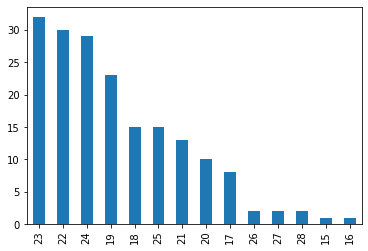

In [ ]:
df2['Your_Age'].value_counts().plot.bar()

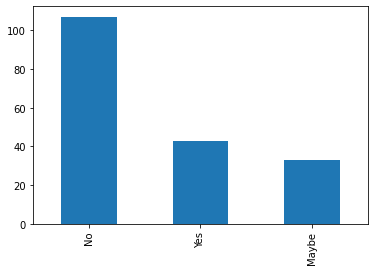

In [ ]:
df2['Were_you_ever_infected_by_Covid19?'].value_counts().plot.bar()

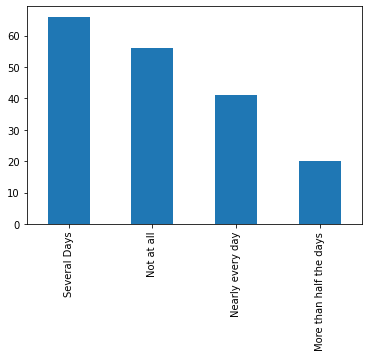

In [ ]:
df2['Feeling_afraid__as_if_something_awful_might_happen'].value_counts().plot.bar()

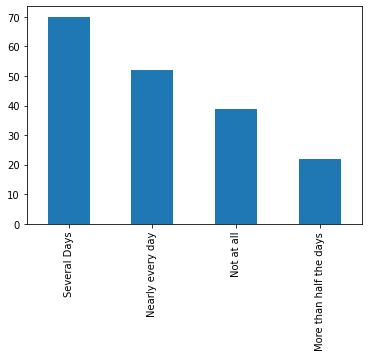

In [ ]:
df2['Feeling_down__depressed__or_hopeless'].value_counts().plot.bar()

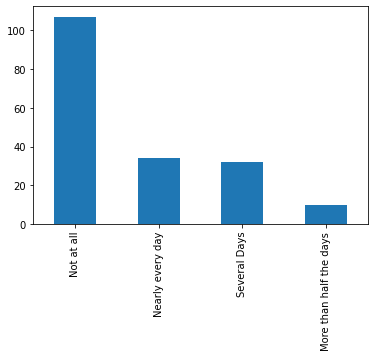

In [ ]:
df2['Thoughts_that_you_would_be_better_off_dead__or_of_hurting_yourself'].value_counts().plot.bar()

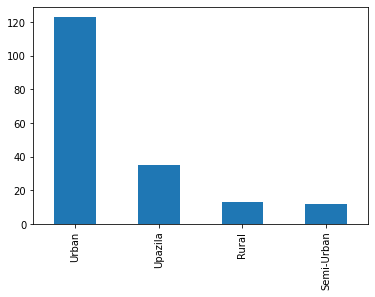

In [ ]:
df2['Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19'].value_counts().plot.bar()

# **Creating Separate List For making Depression Column**

In [ ]:
df2.columns

Index(['Your_Age', 'Your_Gender', 'Name_of_your_Educational_Institution',
       'Institution_Type',
       'District_where_you_stayed_when_education_institutions_were_closed_for_Covid19',
       'Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19',
       'What_is_your_Family_Income_Status?',
       'Number_of_bedrooms_in_your_house?', 'Do_you_have_a_separate_bedroom?',
       'Were_you_ever_infected_by_Covid19?',
       'Has_anyone_in_your_family_ever_been_infected_by_Covid19?__',
       'If_you_or_your_family_had_been_ever_infected_by_Covid19__how_much_did_it_affect_your_mental_health_during_that_time?_',
       'Had_any_of_your_family_members_(including_yourself)_lost_their_job_or_business_due_to_Covid19?',
       'With_all_the_deaths_due_to_Covid19_around_us_in_general__how_much_did_it_affect_your_mental_health?',
       'Are_you_a_smoker?', 'Do_you_have_any_underlying_medical_condition?_',
       'Do_any_of_your_family_members_have_any

In [ ]:
#1.for Little_Interest_or_Pleasure_in_doing_things column
little = []

tempLittle = df2.Little_Interest_or_Pleasure_in_doing_things.values.tolist()

for i in tempLittle:
  if i == 'Not at all':
    little.append(int(0))
  elif i == 'Several Days':
    little.append(int(1))
  elif i == 'More than half the days':
    little.append(int(2))
  else:
    little.append(int(3))


#2.Feeling_down__depressed__or_hopeless
FeelingDep = []
tempFD = df2.Feeling_down__depressed__or_hopeless.values.tolist()

for i in tempFD:
  if i == 'Not at all':
    FeelingDep.append(int(0))
  elif i == 'Several Days':
    FeelingDep.append(int(1))
  elif i == 'More than half the days':
    FeelingDep.append(int(2))
  else:
    FeelingDep.append(int(3))


#3.Trouble falling or staying asleep, or sleeping too much
tfs = []
tempTfs = df2.Trouble_Falling_or_staying_asleep__or_sleeping_too_much.values.tolist()
for i in tempTfs:
  if i == 'Not at all':
    tfs.append(int(0))
  elif i == 'Several Days':
    tfs.append(int(1))
  elif i == 'More than half the days':
    tfs.append(int(2))
  else:
    tfs.append(int(3))

#4.Feeling tired or having little energy
fte = []
tempfte = df2.Feeling_tired_or_having_little_energy_.values.tolist()
for i in tempfte:
  if i == 'Not at all':
    fte.append(int(0))
  elif i == 'Several Days':
    fte.append(int(1))
  elif i == 'More than half the days':
    fte.append(int(2))
  else:
    fte.append(int(3))

#5.Poor appetite or overeating
pao = []
temppao = df2.Poor_appetite_or_overeating.values.tolist()
for i in temppao:
  if i == 'Not at all':
    pao.append(int(0))
  elif i == 'Several Days':
    pao.append(int(1))
  elif i == 'More than half the days':
    pao.append(int(2))
  else:
    pao.append(int(3))

#6.Feeling bad about yourself or that you are a failure or have let yourself or your family down
fba = []
tempfba = df2.Feeling_bad_about_yourself_or_that_you_are_a_failure_or_you_have_let_your_family_down.values.tolist()
for i in tempfba:
  if i == 'Not at all':
    fba.append(int(0))
  elif i == 'Several Days':
    fba.append(int(1))
  elif i == 'More than half the days':
    fba.append(int(2))
  else:
    fba.append(int(3))

#7.Trouble concentrating on things, such as reading the newspaper or watching television
tct = []
temptct = df2.Trouble_concentrating_on_things__such_as_reading__watching_tv_or_videos__studying.values.tolist()
for i in temptct:
  if i == 'Not at all':
    tct.append(int(0))
  elif i == 'Several Days':
    tct.append(int(1))
  elif i == 'More than half the days':
    tct.append(int(2))
  else:
    tct.append(int(3))

# print(tct)
# print(temptct)

#8.Moving or speaking so slowly that other people could
# have noticed. Or the opposite being so figety or
# restless that you have been moving around a lot more
# than usual
msp = []
tempmsp = df2.Moving_or_speaking_so_slowly_that_other_people_could_have_noticed_it__Or_the_opposite_being_so_restless_that_you_have_been_moving_around_a_lot_more_than_usual.values.tolist()
for i in tempmsp:
  if i == 'Not at all':
    msp.append(int(0))
  elif i == 'Several Days':
    msp.append(int(1))
  elif i == 'More than half the days':
    msp.append(int(2))
  else:
    msp.append(int(3))

# 9.Thoughts that you would be better off dead, or of
# hurting yourself

tyd = []
temptyd = df2.Thoughts_that_you_would_be_better_off_dead__or_of_hurting_yourself.values.tolist()
for i in temptyd:
  if i == 'Not at all':
    tyd.append(int(0))
  elif i == 'Several Days':
    tyd.append(int(1))
  elif i == 'More than half the days':
    tyd.append(int(2))
  else:
    tyd.append(int(3))


# **Making Depression column This is formatted as code using PHQ-9**

In [ ]:
# 1 --> little
# 2--> FeelingDep
# 3--> tfs
# 4-->fte
# 5--->pao
# 6--->fba
#7-->tct
# 8--->msp
# 9-->tyd

# 1-4 Minimal depression 
# 5-9 Mild depression
# 10-14 Moderate depressi
# 15-19 Moderately severe depression
# 20-27 Severe depression 


depression_level = []
for i in range(183):
  val = little[i] + FeelingDep[i] + tfs[i] + fte[i] + pao[i] + fba[i] + msp[i] + tyd[i] + tct[i]
  if(val >= 1 and val <= 4):
    depression_level.append('Minimal depression')
  elif(val >= 5 and val <= 9):
    depression_level.append('Mild depression')
  elif(val >= 10 and val <= 14):
    depression_level.append('Moderate depressi')
  elif(val >= 15 and val <= 19):
    depression_level.append('Moderately severe depression')
  else:
    depression_level.append('Severe depression')
df2 = df2.assign(depression_level = depression_level)
df2.head()


,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,Little_Interest_or_Pleasure_in_doing_things,Feeling_down__depressed__or_hopeless,Trouble_Falling_or_staying_asleep__or_sleeping_too_much,Feeling_tired_or_having_little_energy_,Poor_appetite_or_overeating,Feeling_bad_about_yourself_or_that_you_are_a_failure_or_you_have_let_your_family_down,Trouble_concentrating_on_things__such_as_reading__watching_tv_or_videos__studying,Moving_or_speaking_so_slowly_that_other_people_could_have_noticed_it__Or_the_opposite_being_so_restless_that_you_have_been_moving_around_a_lot_more_than_usual,Thoughts_that_you_would_be_better_off_dead__or_of_hurting_yourself,depression_level
0,15,Female,Viqarunnisa Noon School And College,School,Dhaka,Urban,Middle class,3 bedrooms,Yes,No,...,Not at all,Several Days,Several Days,Nearly every day,More than half the days,Not at all,Several Days,Not at all,Not at all,Mild depression
1,16,Female,Motijheel Govt Girls High School,School,Dhaka,Urban,Middle class,2 bedrooms,No,No,...,Not at all,Several Days,Not at all,Not at all,Not at all,Several Days,Not at all,Not at all,Not at all,Minimal depression
2,17,Male,Birshreshtha Munshi Abdur Rouf Public College,College,Dhaka,Urban,Prefer Not to say,2 bedrooms,Yes,No,...,Several Days,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Nearly every day,Not at all,More than half the days,Moderately severe depression
3,17,Male,Scholar's School and College,College,Dhaka,Urban,Upper-Middle class,3 bedrooms,Yes,Maybe,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day,Severe depression
4,17,Male,Noakhali Government college,College,Noakhali,Upazila,Middle class,4 bedrooms or greater,Yes,No,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day,Severe depression


# **Making Separate List for Anxiety Column**

In [ ]:
# 1. Feeling nervous, anxious, or on edge
fnv = []
tempfnv = df2.Feeling_nervous__anxious__or_on_the_edge__.values.tolist()

for i in tempfnv:
  if i == 'Not at all':
    fnv.append(int(0))
  elif i == 'Several Days':
    fnv.append(int(1))
  elif i == 'More than half the days':
    fnv.append(int(2))
  else:
    fnv.append(int(3))
# 2. Not being able to stop or control worrying
nbw = []
tempnbw = df2.Not_being_able_to_stop_or_control_worrying.values.tolist()
for i in tempnbw:
  if i == 'Not at all':
    nbw.append(int(0))
  elif i == 'Several Days':
    nbw.append(int(1))
  elif i == 'More than half the days':
    nbw.append(int(2))
  else:
    nbw.append(int(3))
# 3. Worrying too much about different things
wtm = []
tempwtm = df2.Worrying_too_much_about_different_things.values.tolist()
for i in tempwtm:
  if i == 'Not at all':
    wtm.append(int(0))
  elif i == 'Several Days':
    wtm.append(int(1))
  elif i == 'More than half the days':
    wtm.append(int(2))
  else:
    wtm.append(int(3))
# 4. Trouble relaxing
tr = []
temptr = df2.Trouble_relaxing.values.tolist()
for i in temptr:
  if i == 'Not at all':
    tr.append(int(0))
  elif i == 'Several Days':
    tr.append(int(1))
  elif i == 'More than half the days':
    tr.append(int(2))
  else:
    tr.append(int(3))
# 5. Being so restless that it is hard to sit still
bss = []
tempbss = df2.Being_so_restless_that_it_is_hard_to_sit_still.values.tolist()
for i in tempbss:
  if i == 'Not at all':
    bss.append(int(0))
  elif i == 'Several Days':
    bss.append(int(1))
  elif i == 'More than half the days':
    bss.append(int(2))
  else:
    bss.append(int(3))
# 6. Becoming easily annoyed or irritable
bei = []
tempbei = df2.Becoming_easily_annoyed_or_irritable.values.tolist()
for i in tempbei:
  if i == 'Not at all':
    bei.append(int(0))
  elif i == 'Several Days':
    bei.append(int(1))
  elif i == 'More than half the days':
    bei.append(int(2))
  else:
    bei.append(int(3))
# 7. Feeling afraid, as if something awful
# might happen
fah = []
tempfah = df2.Feeling_afraid__as_if_something_awful_might_happen.values.tolist()
for i in tempfah:
  if i == 'Not at all':
    fah.append(int(0))
  elif i == 'Several Days':
    fah.append(int(1))
  elif i == 'More than half the days':
    fah.append(int(2))
  else:
    fah.append(int(3))


# **Making Anxiety Column using PHQ-9**

In [ ]:
# fnv
# nbw
# wtm
# tr
# bss
# bei
# fah

# 0–4: minimal anxiety
# 5–9: mild anxiety
# 10–14: moderate anxiety
# 15–21: severe anxiety  

Anxiety_level = []
for i in range(183):
  val = fnv[i] + nbw[i] + wtm[i] + tr[i] + bss[i] + bei[i] + fah[i]
  if(val >= 1 and val <= 4):
    Anxiety_level.append('Minimal anxiety')
  elif(val >= 5 and val <= 9):
    Anxiety_level.append('Mild anxiety')
  elif(val >= 10 and val <= 14):
    Anxiety_level.append('Moderate anxiety')
  else:
    Anxiety_level.append('Severe anxiety')

print(Anxiety_level)
df2 = df2.assign(Anxiety_level = Anxiety_level)
df2.head()


['Minimal anxiety', 'Minimal anxiety', 'Moderate anxiety', 'Severe anxiety', 'Severe anxiety', 'Mild anxiety', 'Mild anxiety', 'Severe anxiety', 'Moderate anxiety', 'Mild anxiety', 'Severe anxiety', 'Moderate anxiety', 'Moderate anxiety', 'Severe anxiety', 'Mild anxiety', 'Mild anxiety', 'Severe anxiety', 'Minimal anxiety', 'Moderate anxiety', 'Severe anxiety', 'Moderate anxiety', 'Severe anxiety', 'Moderate anxiety', 'Mild anxiety', 'Moderate anxiety', 'Mild anxiety', 'Severe anxiety', 'Severe anxiety', 'Severe anxiety', 'Severe anxiety', 'Severe anxiety', 'Moderate anxiety', 'Moderate anxiety', 'Severe anxiety', 'Severe anxiety', 'Minimal anxiety', 'Severe anxiety', 'Minimal anxiety', 'Mild anxiety', 'Minimal anxiety', 'Minimal anxiety', 'Mild anxiety', 'Moderate anxiety', 'Mild anxiety', 'Severe anxiety', 'Moderate anxiety', 'Minimal anxiety', 'Mild anxiety', 'Severe anxiety', 'Severe anxiety', 'Severe anxiety', 'Severe anxiety', 'Severe anxiety', 'Severe anxiety', 'Minimal anxiety'

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,Feeling_down__depressed__or_hopeless,Trouble_Falling_or_staying_asleep__or_sleeping_too_much,Feeling_tired_or_having_little_energy_,Poor_appetite_or_overeating,Feeling_bad_about_yourself_or_that_you_are_a_failure_or_you_have_let_your_family_down,Trouble_concentrating_on_things__such_as_reading__watching_tv_or_videos__studying,Moving_or_speaking_so_slowly_that_other_people_could_have_noticed_it__Or_the_opposite_being_so_restless_that_you_have_been_moving_around_a_lot_more_than_usual,Thoughts_that_you_would_be_better_off_dead__or_of_hurting_yourself,depression_level,Anxiety_level
0,15,Female,Viqarunnisa Noon School And College,School,Dhaka,Urban,Middle class,3 bedrooms,Yes,No,...,Several Days,Several Days,Nearly every day,More than half the days,Not at all,Several Days,Not at all,Not at all,Mild depression,Minimal anxiety
1,16,Female,Motijheel Govt Girls High School,School,Dhaka,Urban,Middle class,2 bedrooms,No,No,...,Several Days,Not at all,Not at all,Not at all,Several Days,Not at all,Not at all,Not at all,Minimal depression,Minimal anxiety
2,17,Male,Birshreshtha Munshi Abdur Rouf Public College,College,Dhaka,Urban,Prefer Not to say,2 bedrooms,Yes,No,...,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Nearly every day,Not at all,More than half the days,Moderately severe depression,Moderate anxiety
3,17,Male,Scholar's School and College,College,Dhaka,Urban,Upper-Middle class,3 bedrooms,Yes,Maybe,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day,Severe depression,Severe anxiety
4,17,Male,Noakhali Government college,College,Noakhali,Upazila,Middle class,4 bedrooms or greater,Yes,No,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day,Severe depression,Severe anxiety


# **Dropping Unnecessary Column**

In [ ]:
df_temp = df2.copy()
#drop column, those are related with depression level
df_final = df_temp.drop(["Little_Interest_or_Pleasure_in_doing_things",
                         "Feeling_down__depressed__or_hopeless",
                         "Trouble_Falling_or_staying_asleep__or_sleeping_too_much",
                         "Feeling_tired_or_having_little_energy_",
                         "Poor_appetite_or_overeating",
                         "Feeling_bad_about_yourself_or_that_you_are_a_failure_or_you_have_let_your_family_down",
                         "Trouble_concentrating_on_things__such_as_reading__watching_tv_or_videos__studying",
                         "Moving_or_speaking_so_slowly_that_other_people_could_have_noticed_it__Or_the_opposite_being_so_restless_that_you_have_been_moving_around_a_lot_more_than_usual", 
                        "Thoughts_that_you_would_be_better_off_dead__or_of_hurting_yourself"], axis = 1)

#drop column, those are related with anxiety level
df_final = df_final.drop(["Feeling_nervous__anxious__or_on_the_edge__",
                         "Not_being_able_to_stop_or_control_worrying",
                         "Worrying_too_much_about_different_things",
                         "Trouble_relaxing",
                         "Being_so_restless_that_it_is_hard_to_sit_still",
                         "Becoming_easily_annoyed_or_irritable",
                         "Feeling_afraid__as_if_something_awful_might_happen"],
                         axis = 1)

df_final.shape


(183, 36)

In [ ]:
df_final.head()

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,In_which_platform_you_interact_better_with_teachers?,In_which_platform_do_you_understand_better?_,How_much_did_you_play_computer/mobile/video_games_before_the_reopening_of_your_institution?__,How_much_do_you_play_computer/mobile/video_games_now?,Amount_of_Social_Media_browsing_(News_Feed__YouTube__TikTok__Instagram__etc_)_in_the_past_week?,Amount_of_Social_Media_communication_(Messenger__WhatsApp__Telegram__etc_)_in_the_past_week?_,Physical_Exercise_in_the_past_week?_,Meeting_with_friends_or_relatives_in_the_past_week?_,depression_level,Anxiety_level
0,15,Female,Viqarunnisa Noon School And College,School,Dhaka,Urban,Middle class,3 bedrooms,Yes,No,...,Offline,Offline,None,None,Extreme (more than 1 hour per day),Extreme (more than 1 hour per day),Daily,More times,Mild depression,Minimal anxiety
1,16,Female,Motijheel Govt Girls High School,School,Dhaka,Urban,Middle class,2 bedrooms,No,No,...,Online,Online,Slightly,Slightly,Moderately (31-60 mins per day),Moderately (31-60 mins per day),Slightly,4-7 times,Minimal depression,Minimal anxiety
2,17,Male,Birshreshtha Munshi Abdur Rouf Public College,College,Dhaka,Urban,Prefer Not to say,2 bedrooms,Yes,No,...,Both,Both,Moderately,Moderately,Moderately (31-60 mins per day),Moderately (31-60 mins per day),None,None,Moderately severe depression,Moderate anxiety
3,17,Male,Scholar's School and College,College,Dhaka,Urban,Upper-Middle class,3 bedrooms,Yes,Maybe,...,Offline,None,Extreme,Extreme,Extreme (more than 1 hour per day),Extreme (more than 1 hour per day),Moderately,4-7 times,Severe depression,Severe anxiety
4,17,Male,Noakhali Government college,College,Noakhali,Upazila,Middle class,4 bedrooms or greater,Yes,No,...,Both,Offline,Extreme,Moderately,Extreme (more than 1 hour per day),Extreme (more than 1 hour per day),Slightly,4-7 times,Severe depression,Severe anxiety


# **Label Encodding Scalling**

In [ ]:
df_final.head()
lbl_encode = df_final.copy()

In [ ]:
lb_make = LabelEncoder()

In [ ]:
lbl_encode.head()

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,In_which_platform_you_interact_better_with_teachers?,In_which_platform_do_you_understand_better?_,How_much_did_you_play_computer/mobile/video_games_before_the_reopening_of_your_institution?__,How_much_do_you_play_computer/mobile/video_games_now?,Amount_of_Social_Media_browsing_(News_Feed__YouTube__TikTok__Instagram__etc_)_in_the_past_week?,Amount_of_Social_Media_communication_(Messenger__WhatsApp__Telegram__etc_)_in_the_past_week?_,Physical_Exercise_in_the_past_week?_,Meeting_with_friends_or_relatives_in_the_past_week?_,depression_level,Anxiety_level
0,15,Female,Viqarunnisa Noon School And College,School,Dhaka,Urban,Middle class,3 bedrooms,Yes,No,...,Offline,Offline,None,None,Extreme (more than 1 hour per day),Extreme (more than 1 hour per day),Daily,More times,Mild depression,Minimal anxiety
1,16,Female,Motijheel Govt Girls High School,School,Dhaka,Urban,Middle class,2 bedrooms,No,No,...,Online,Online,Slightly,Slightly,Moderately (31-60 mins per day),Moderately (31-60 mins per day),Slightly,4-7 times,Minimal depression,Minimal anxiety
2,17,Male,Birshreshtha Munshi Abdur Rouf Public College,College,Dhaka,Urban,Prefer Not to say,2 bedrooms,Yes,No,...,Both,Both,Moderately,Moderately,Moderately (31-60 mins per day),Moderately (31-60 mins per day),None,None,Moderately severe depression,Moderate anxiety
3,17,Male,Scholar's School and College,College,Dhaka,Urban,Upper-Middle class,3 bedrooms,Yes,Maybe,...,Offline,None,Extreme,Extreme,Extreme (more than 1 hour per day),Extreme (more than 1 hour per day),Moderately,4-7 times,Severe depression,Severe anxiety
4,17,Male,Noakhali Government college,College,Noakhali,Upazila,Middle class,4 bedrooms or greater,Yes,No,...,Both,Offline,Extreme,Moderately,Extreme (more than 1 hour per day),Extreme (more than 1 hour per day),Slightly,4-7 times,Severe depression,Severe anxiety


In [ ]:
for column in df_final:
  if column == 'Your_Age':
    continue
  lbl_encode[column] = lb_make.fit_transform(df_final[column])

In [ ]:
lbl_encode.head()

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,In_which_platform_you_interact_better_with_teachers?,In_which_platform_do_you_understand_better?_,How_much_did_you_play_computer/mobile/video_games_before_the_reopening_of_your_institution?__,How_much_do_you_play_computer/mobile/video_games_now?,Amount_of_Social_Media_browsing_(News_Feed__YouTube__TikTok__Instagram__etc_)_in_the_past_week?,Amount_of_Social_Media_communication_(Messenger__WhatsApp__Telegram__etc_)_in_the_past_week?_,Physical_Exercise_in_the_past_week?_,Meeting_with_friends_or_relatives_in_the_past_week?_,depression_level,Anxiety_level
0,15,0,29,1,4,3,2,2,2,1,...,2,2,2,2,0,0,0,2,0,1
1,16,0,14,1,4,3,2,1,1,1,...,3,3,3,3,1,1,3,1,1,1
2,17,1,4,0,4,3,4,1,2,1,...,0,0,1,1,1,1,2,3,3,2
3,17,1,24,0,4,3,5,2,2,0,...,2,1,0,0,0,0,1,1,4,3
4,17,1,15,0,21,2,2,3,2,1,...,0,2,0,1,0,0,3,1,4,3


In [ ]:
lbl_encode.dropna(inplace = True)
print(lbl_encode.shape)

(183, 36)


In [ ]:
scale_vars = ['Your_Age']
scaler = MinMaxScaler()
lbl_encode[scale_vars] = scaler.fit_transform(lbl_encode[scale_vars])
lbl_encode.head()

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,In_which_platform_you_interact_better_with_teachers?,In_which_platform_do_you_understand_better?_,How_much_did_you_play_computer/mobile/video_games_before_the_reopening_of_your_institution?__,How_much_do_you_play_computer/mobile/video_games_now?,Amount_of_Social_Media_browsing_(News_Feed__YouTube__TikTok__Instagram__etc_)_in_the_past_week?,Amount_of_Social_Media_communication_(Messenger__WhatsApp__Telegram__etc_)_in_the_past_week?_,Physical_Exercise_in_the_past_week?_,Meeting_with_friends_or_relatives_in_the_past_week?_,depression_level,Anxiety_level
0,0.000000,0,29,1,4,3,2,2,2,1,...,2,2,2,2,0,0,0,2,0,1
1,0.076923,0,14,1,4,3,2,1,1,1,...,3,3,3,3,1,1,3,1,1,1
2,0.153846,1,4,0,4,3,4,1,2,1,...,0,0,1,1,1,1,2,3,3,2
3,0.153846,1,24,0,4,3,5,2,2,0,...,2,1,0,0,0,0,1,1,4,3
4,0.153846,1,15,0,21,2,2,3,2,1,...,0,2,0,1,0,0,3,1,4,3


# **Predict Depression**




In [ ]:
lbl_encode.dropna(inplace = True)
print(lbl_encode.shape)

(183, 36)


In [ ]:
lbl_encode.columns

Index(['Your_Age', 'Your_Gender', 'Name_of_your_Educational_Institution',
       'Institution_Type',
       'District_where_you_stayed_when_education_institutions_were_closed_for_Covid19',
       'Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19',
       'What_is_your_Family_Income_Status?',
       'Number_of_bedrooms_in_your_house?', 'Do_you_have_a_separate_bedroom?',
       'Were_you_ever_infected_by_Covid19?',
       'Has_anyone_in_your_family_ever_been_infected_by_Covid19?__',
       'If_you_or_your_family_had_been_ever_infected_by_Covid19__how_much_did_it_affect_your_mental_health_during_that_time?_',
       'Had_any_of_your_family_members_(including_yourself)_lost_their_job_or_business_due_to_Covid19?',
       'With_all_the_deaths_due_to_Covid19_around_us_in_general__how_much_did_it_affect_your_mental_health?',
       'Are_you_a_smoker?', 'Do_you_have_any_underlying_medical_condition?_',
       'Do_any_of_your_family_members_have_any

In [ ]:
# lbl_encode_depression = lbl_encode.copy()
new_columns = ['Age','Gender','Institute','Type','Dist','Loc','Income','Bed','Sep_Bed','Self_Cov','Fam_Cov','Affect','J_loss',
              'Death','Smoker','Self_Med','Fam_Med','Afraid','Counsel','Counsel_N','Depr','Rel','Adapt','Lag','Inter_Fr','Exam',
              'Inter_Teach','Underst','Game_b','Game_a','Social_br','Social_com','Exerc','Meet','depression_level','Anxiety_level']
len(new_columns)             

36

In [ ]:
len(lbl_encode.columns)

36

In [ ]:
lbl_encode.columns = new_columns

In [ ]:
# scale_vars = lbl_encode.drop(columns = 'depression_level')
no_dep = lbl_encode.drop(columns = 'depression_level')
no_anx = no_dep.drop(columns = 'Anxiety_level')
scale_vars = no_anx.columns
scaler = MinMaxScaler()
lbl_encode_scaled = lbl_encode.copy()
lbl_encode_scaled[scale_vars] = scaler.fit_transform(lbl_encode[scale_vars])
lbl_encode_scaled.head()

,Age,Gender,Institute,Type,Dist,Loc,Income,Bed,Sep_Bed,Self_Cov,...,Inter_Teach,Underst,Game_b,Game_a,Social_br,Social_com,Exerc,Meet,depression_level,Anxiety_level
0,0.000000,0.0,1.000000,0.5,0.16,1.000000,0.4,0.666667,1.0,0.5,...,0.666667,0.666667,0.666667,0.666667,0.000000,0.000000,0.000000,0.666667,0,1
1,0.076923,0.0,0.482759,0.5,0.16,1.000000,0.4,0.333333,0.5,0.5,...,1.000000,1.000000,1.000000,1.000000,0.333333,0.333333,1.000000,0.333333,1,1
2,0.153846,1.0,0.137931,0.0,0.16,1.000000,0.8,0.333333,1.0,0.5,...,0.000000,0.000000,0.333333,0.333333,0.333333,0.333333,0.666667,1.000000,3,2
3,0.153846,1.0,0.827586,0.0,0.16,1.000000,1.0,0.666667,1.0,0.0,...,0.666667,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,4,3
4,0.153846,1.0,0.517241,0.0,0.84,0.666667,0.4,1.000000,1.0,0.5,...,0.000000,0.666667,0.000000,0.333333,0.000000,0.000000,1.000000,0.333333,4,3


In [ ]:
lbl_encode_scaled.columns

Index(['Age', 'Gender', 'Institute', 'Type', 'Dist', 'Loc', 'Income', 'Bed',
       'Sep_Bed', 'Self_Cov', 'Fam_Cov', 'Affect', 'J_loss', 'Death', 'Smoker',
       'Self_Med', 'Fam_Med', 'Afraid', 'Counsel', 'Counsel_N', 'Depr', 'Rel',
       'Adapt', 'Lag', 'Inter_Fr', 'Exam', 'Inter_Teach', 'Underst', 'Game_b',
       'Game_a', 'Social_br', 'Social_com', 'Exerc', 'Meet',
       'depression_level', 'Anxiety_level'],
      dtype='object')

In [ ]:
lbl_encode_depression = lbl_encode_scaled.copy()
lbl_encode_depression.columns

Index(['Age', 'Gender', 'Institute', 'Type', 'Dist', 'Loc', 'Income', 'Bed',
       'Sep_Bed', 'Self_Cov', 'Fam_Cov', 'Affect', 'J_loss', 'Death', 'Smoker',
       'Self_Med', 'Fam_Med', 'Afraid', 'Counsel', 'Counsel_N', 'Depr', 'Rel',
       'Adapt', 'Lag', 'Inter_Fr', 'Exam', 'Inter_Teach', 'Underst', 'Game_b',
       'Game_a', 'Social_br', 'Social_com', 'Exerc', 'Meet',
       'depression_level', 'Anxiety_level'],
      dtype='object')

In [ ]:
lbl_encode_anxiety = lbl_encode_scaled.copy()

In [ ]:
lbl_encode_anxiety = lbl_encode_anxiety.drop(columns = 'depression_level')
y_anx = lbl_encode_anxiety['Anxiety_level']
X_anx = lbl_encode_anxiety.drop(columns = 'Anxiety_level')

In [ ]:
X_anx.head()

,Age,Gender,Institute,Type,Dist,Loc,Income,Bed,Sep_Bed,Self_Cov,...,Inter_Fr,Exam,Inter_Teach,Underst,Game_b,Game_a,Social_br,Social_com,Exerc,Meet
0,0.000000,0.0,1.000000,0.5,0.16,1.000000,0.4,0.666667,1.0,0.5,...,0.000000,0.000000,0.666667,0.666667,0.666667,0.666667,0.000000,0.000000,0.000000,0.666667
1,0.076923,0.0,0.482759,0.5,0.16,1.000000,0.4,0.333333,0.5,0.5,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.333333,0.333333,1.000000,0.333333
2,0.153846,1.0,0.137931,0.0,0.16,1.000000,0.8,0.333333,1.0,0.5,...,1.000000,0.666667,0.000000,0.000000,0.333333,0.333333,0.333333,0.333333,0.666667,1.000000
3,0.153846,1.0,0.827586,0.0,0.16,1.000000,1.0,0.666667,1.0,0.0,...,0.333333,1.000000,0.666667,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333
4,0.153846,1.0,0.517241,0.0,0.84,0.666667,0.4,1.000000,1.0,0.5,...,0.666667,0.333333,0.000000,0.666667,0.000000,0.333333,0.000000,0.000000,1.000000,0.333333


In [ ]:
X_train_anx, X_test_anx, y_train_anx, y_test_anx = train_test_split(X_anx, y_anx, test_size = 0.2, random_state = 5)

In [ ]:
corr2 = X_train_anx.corr()
corr2

,Age,Gender,Institute,Type,Dist,Loc,Income,Bed,Sep_Bed,Self_Cov,...,Inter_Fr,Exam,Inter_Teach,Underst,Game_b,Game_a,Social_br,Social_com,Exerc,Meet
Age,1.000000,0.307255,0.328330,0.758093,-0.305735,0.211633,-0.021440,0.150740,0.275500,0.009404,...,-0.191651,0.339903,0.205482,0.062781,-0.033579,0.136425,0.050074,-0.058664,-0.084000,-0.218711
Gender,0.307255,1.000000,0.032402,0.191179,-0.035815,-0.071654,-0.143612,-0.081118,0.200883,-0.146978,...,0.006555,0.116006,-0.035014,-0.036614,-0.056202,0.094783,0.014829,-0.089843,-0.093717,-0.048465
Institute,0.328330,0.032402,1.000000,0.492728,-0.319850,0.106970,0.003883,0.182577,0.207597,0.067925,...,-0.196511,0.146140,0.186120,0.066771,0.141249,0.174785,0.174799,0.062964,0.072466,-0.034667
Type,0.758093,0.191179,0.492728,1.000000,-0.534548,0.227597,0.036031,0.258766,0.333541,0.095205,...,-0.244205,0.333145,0.144653,0.045859,0.031643,0.149960,0.194396,0.008538,0.043953,-0.152355
Dist,-0.305735,-0.035815,-0.319850,-0.534548,1.000000,-0.404745,-0.139519,-0.135684,-0.254115,-0.078159,...,0.156242,-0.262341,-0.008345,-0.041060,0.036700,-0.151042,-0.155990,-0.115927,-0.045515,0.128778
Loc,0.211633,-0.071654,0.106970,0.227597,-0.404745,1.000000,0.060227,-0.052171,0.078402,0.110023,...,-0.158900,0.209470,0.113575,0.077116,-0.013761,0.090530,0.102055,0.122364,0.136840,0.038724
Income,-0.021440,-0.143612,0.003883,0.036031,-0.139519,0.060227,1.000000,0.329705,0.079209,0.088139,...,0.023696,-0.017120,0.015139,-0.059479,-0.041759,0.098588,0.125576,0.095572,-0.064723,-0.056451
Bed,0.150740,-0.081118,0.182577,0.258766,-0.135684,-0.052171,0.329705,1.000000,0.370800,-0.051738,...,-0.041040,-0.097281,0.092374,0.162130,-0.068541,0.072871,0.126723,0.066291,0.083356,-0.146923
Sep_Bed,0.275500,0.200883,0.207597,0.333541,-0.254115,0.078402,0.079209,0.370800,1.000000,-0.010572,...,-0.080347,0.133338,0.106357,0.059823,-0.009459,0.113980,0.103044,-0.004558,0.028652,0.000915
Self_Cov,0.009404,-0.146978,0.067925,0.095205,-0.078159,0.110023,0.088139,-0.051738,-0.010572,1.000000,...,0.032955,-0.007392,-0.046416,-0.019522,0.064320,0.026810,0.057194,0.191509,-0.011178,0.064482


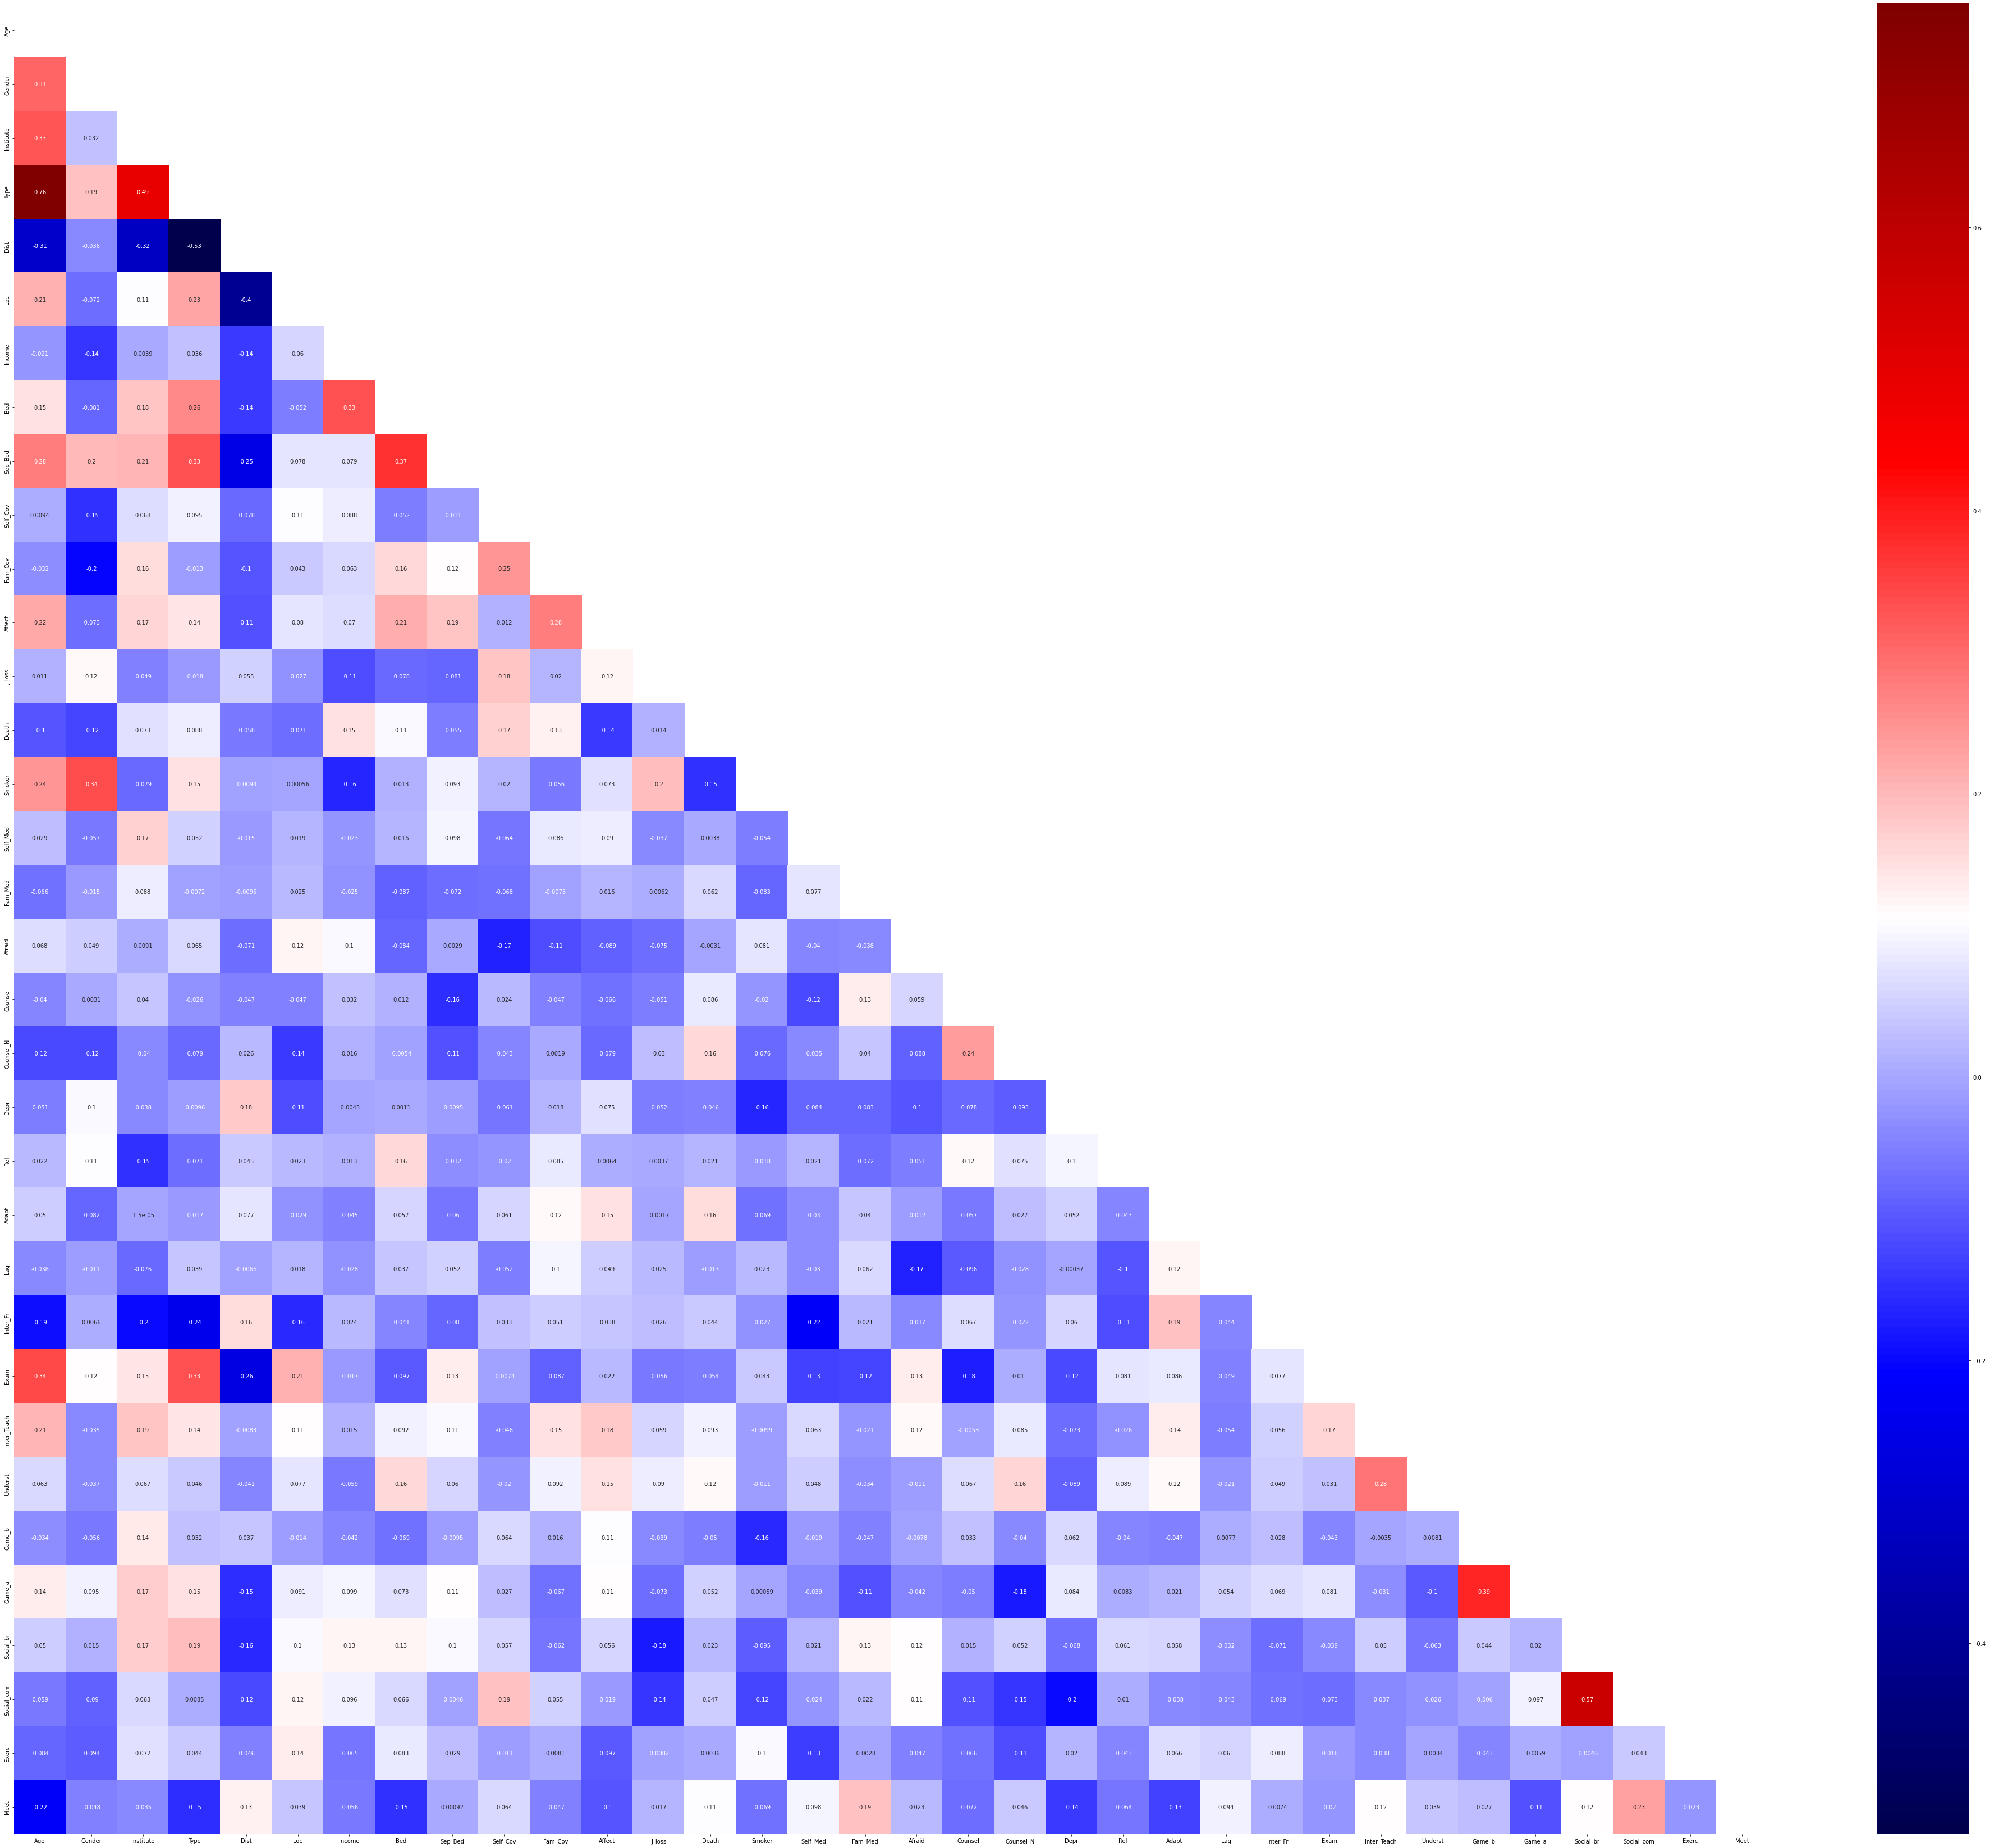

In [ ]:
mask1 = np.triu(np.ones_like(corr2, dtype=bool))
mask2 = np.tril(np.ones_like(corr2, dtype=bool))
plt.figure(figsize = (70,60))
heat_map = sns.heatmap(corr2, annot = True, cmap = "seismic", mask = mask1);
fig = heat_map.get_figure()
fig.savefig("out_anx.png") 

In [ ]:
lbl_encode_depression = lbl_encode_scaled.drop(columns = 'Anxiety_level')
y_dep = lbl_encode_depression['depression_level']
X_dep = lbl_encode_depression.drop(columns = 'depression_level')


In [ ]:
X_dep.head()

,Age,Gender,Institute,Type,Dist,Loc,Income,Bed,Sep_Bed,Self_Cov,...,Inter_Fr,Exam,Inter_Teach,Underst,Game_b,Game_a,Social_br,Social_com,Exerc,Meet
0,0.000000,0.0,1.000000,0.5,0.16,1.000000,0.4,0.666667,1.0,0.5,...,0.000000,0.000000,0.666667,0.666667,0.666667,0.666667,0.000000,0.000000,0.000000,0.666667
1,0.076923,0.0,0.482759,0.5,0.16,1.000000,0.4,0.333333,0.5,0.5,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.333333,0.333333,1.000000,0.333333
2,0.153846,1.0,0.137931,0.0,0.16,1.000000,0.8,0.333333,1.0,0.5,...,1.000000,0.666667,0.000000,0.000000,0.333333,0.333333,0.333333,0.333333,0.666667,1.000000
3,0.153846,1.0,0.827586,0.0,0.16,1.000000,1.0,0.666667,1.0,0.0,...,0.333333,1.000000,0.666667,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333
4,0.153846,1.0,0.517241,0.0,0.84,0.666667,0.4,1.000000,1.0,0.5,...,0.666667,0.333333,0.000000,0.666667,0.000000,0.333333,0.000000,0.000000,1.000000,0.333333


In [ ]:
y_dep.head()

0    0
1    1
2    3
3    4
4    4
Name: depression_level, dtype: int64

In [ ]:
X_train_dep, X_test_dep, y_train_dep, y_test_dep = train_test_split(X_dep, y_dep, test_size = 0.2, random_state = 5)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
X_train.head()

,Age,Gender,Institute,Type,Dist,Loc,Income,Bed,Sep_Bed,Self_Cov,...,Inter_Fr,Exam,Inter_Teach,Underst,Game_b,Game_a,Social_br,Social_com,Exerc,Meet
150,0.692308,1.0,0.758621,1.0,0.04,1.0,1.0,0.666667,1.0,0.5,...,0.000000,1.000000,0.666667,0.666667,0.000000,1.000000,0.000000,0.333333,0.000000,0.333333
39,0.307692,0.0,0.586207,0.0,0.84,1.0,0.4,0.666667,1.0,0.5,...,0.000000,0.000000,0.666667,1.000000,0.666667,0.666667,0.000000,1.000000,0.666667,0.000000
181,1.000000,1.0,0.758621,1.0,0.16,1.0,0.0,0.666667,1.0,0.0,...,1.000000,0.666667,1.000000,1.000000,0.333333,0.333333,0.333333,1.000000,0.333333,0.000000
55,0.384615,0.0,0.758621,1.0,0.16,1.0,0.8,1.000000,1.0,0.0,...,1.000000,0.666667,0.666667,0.666667,1.000000,0.666667,0.333333,0.000000,0.666667,0.000000
71,0.538462,1.0,0.793103,1.0,0.04,1.0,0.4,0.333333,1.0,0.0,...,0.333333,1.000000,0.666667,0.333333,0.333333,1.000000,0.000000,0.000000,0.666667,0.666667


In [ ]:
corr = X_train.corr()
corr

,Age,Gender,Institute,Type,Dist,Loc,Income,Bed,Sep_Bed,Self_Cov,...,Inter_Fr,Exam,Inter_Teach,Underst,Game_b,Game_a,Social_br,Social_com,Exerc,Meet
Age,1.000000,0.307255,0.328330,0.758093,-0.305735,0.211633,-0.021440,0.150740,0.275500,0.009404,...,-0.191651,0.339903,0.205482,0.062781,-0.033579,0.136425,0.050074,-0.058664,-0.084000,-0.218711
Gender,0.307255,1.000000,0.032402,0.191179,-0.035815,-0.071654,-0.143612,-0.081118,0.200883,-0.146978,...,0.006555,0.116006,-0.035014,-0.036614,-0.056202,0.094783,0.014829,-0.089843,-0.093717,-0.048465
Institute,0.328330,0.032402,1.000000,0.492728,-0.319850,0.106970,0.003883,0.182577,0.207597,0.067925,...,-0.196511,0.146140,0.186120,0.066771,0.141249,0.174785,0.174799,0.062964,0.072466,-0.034667
Type,0.758093,0.191179,0.492728,1.000000,-0.534548,0.227597,0.036031,0.258766,0.333541,0.095205,...,-0.244205,0.333145,0.144653,0.045859,0.031643,0.149960,0.194396,0.008538,0.043953,-0.152355
Dist,-0.305735,-0.035815,-0.319850,-0.534548,1.000000,-0.404745,-0.139519,-0.135684,-0.254115,-0.078159,...,0.156242,-0.262341,-0.008345,-0.041060,0.036700,-0.151042,-0.155990,-0.115927,-0.045515,0.128778
Loc,0.211633,-0.071654,0.106970,0.227597,-0.404745,1.000000,0.060227,-0.052171,0.078402,0.110023,...,-0.158900,0.209470,0.113575,0.077116,-0.013761,0.090530,0.102055,0.122364,0.136840,0.038724
Income,-0.021440,-0.143612,0.003883,0.036031,-0.139519,0.060227,1.000000,0.329705,0.079209,0.088139,...,0.023696,-0.017120,0.015139,-0.059479,-0.041759,0.098588,0.125576,0.095572,-0.064723,-0.056451
Bed,0.150740,-0.081118,0.182577,0.258766,-0.135684,-0.052171,0.329705,1.000000,0.370800,-0.051738,...,-0.041040,-0.097281,0.092374,0.162130,-0.068541,0.072871,0.126723,0.066291,0.083356,-0.146923
Sep_Bed,0.275500,0.200883,0.207597,0.333541,-0.254115,0.078402,0.079209,0.370800,1.000000,-0.010572,...,-0.080347,0.133338,0.106357,0.059823,-0.009459,0.113980,0.103044,-0.004558,0.028652,0.000915
Self_Cov,0.009404,-0.146978,0.067925,0.095205,-0.078159,0.110023,0.088139,-0.051738,-0.010572,1.000000,...,0.032955,-0.007392,-0.046416,-0.019522,0.064320,0.026810,0.057194,0.191509,-0.011178,0.064482


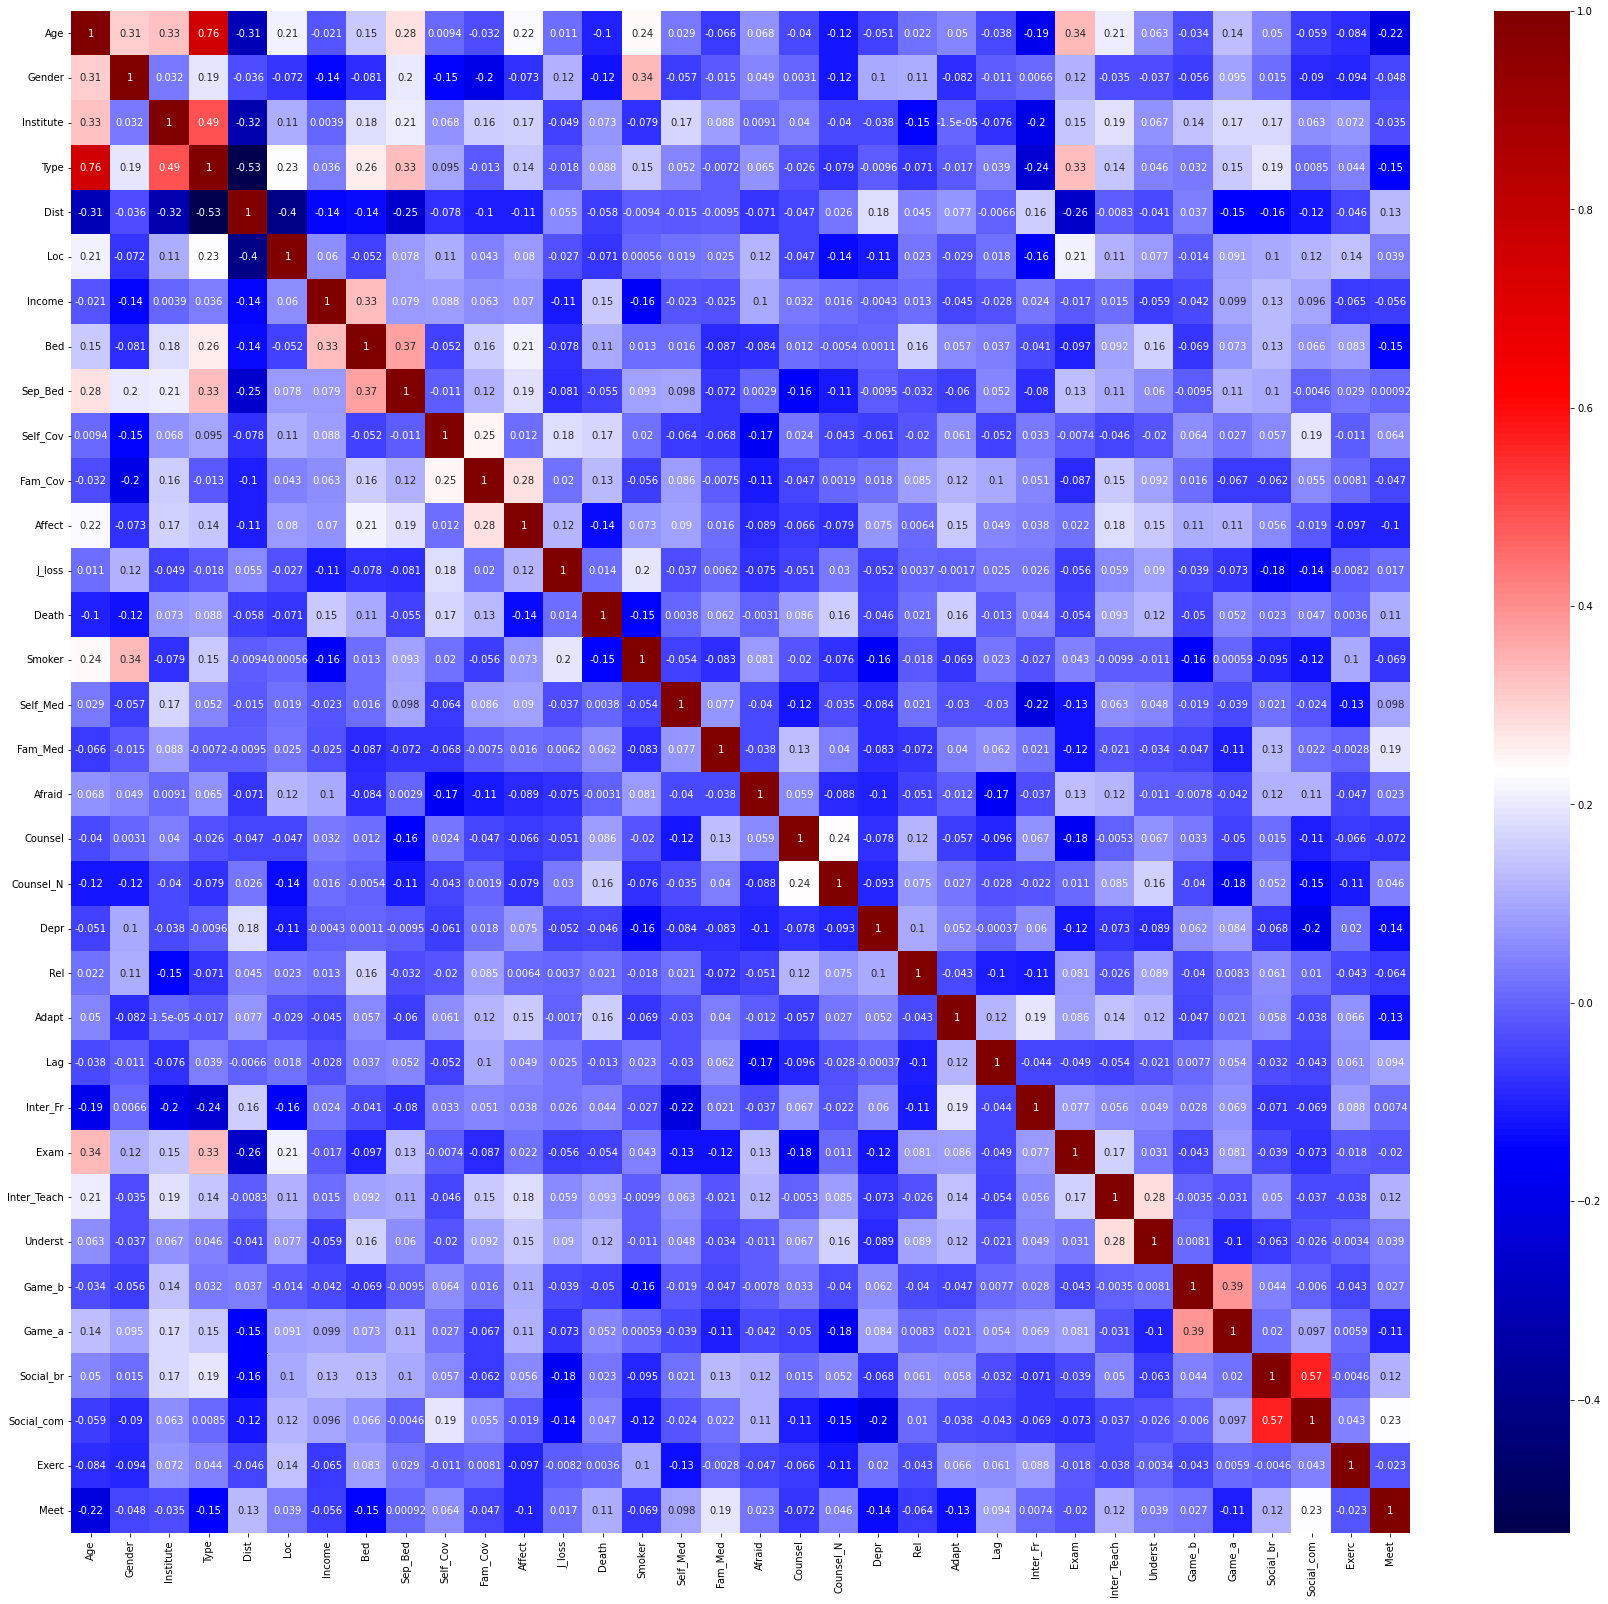

In [ ]:
plt.figure(figsize = (30,28))
sns.heatmap(corr, annot = True, cmap = "seismic")

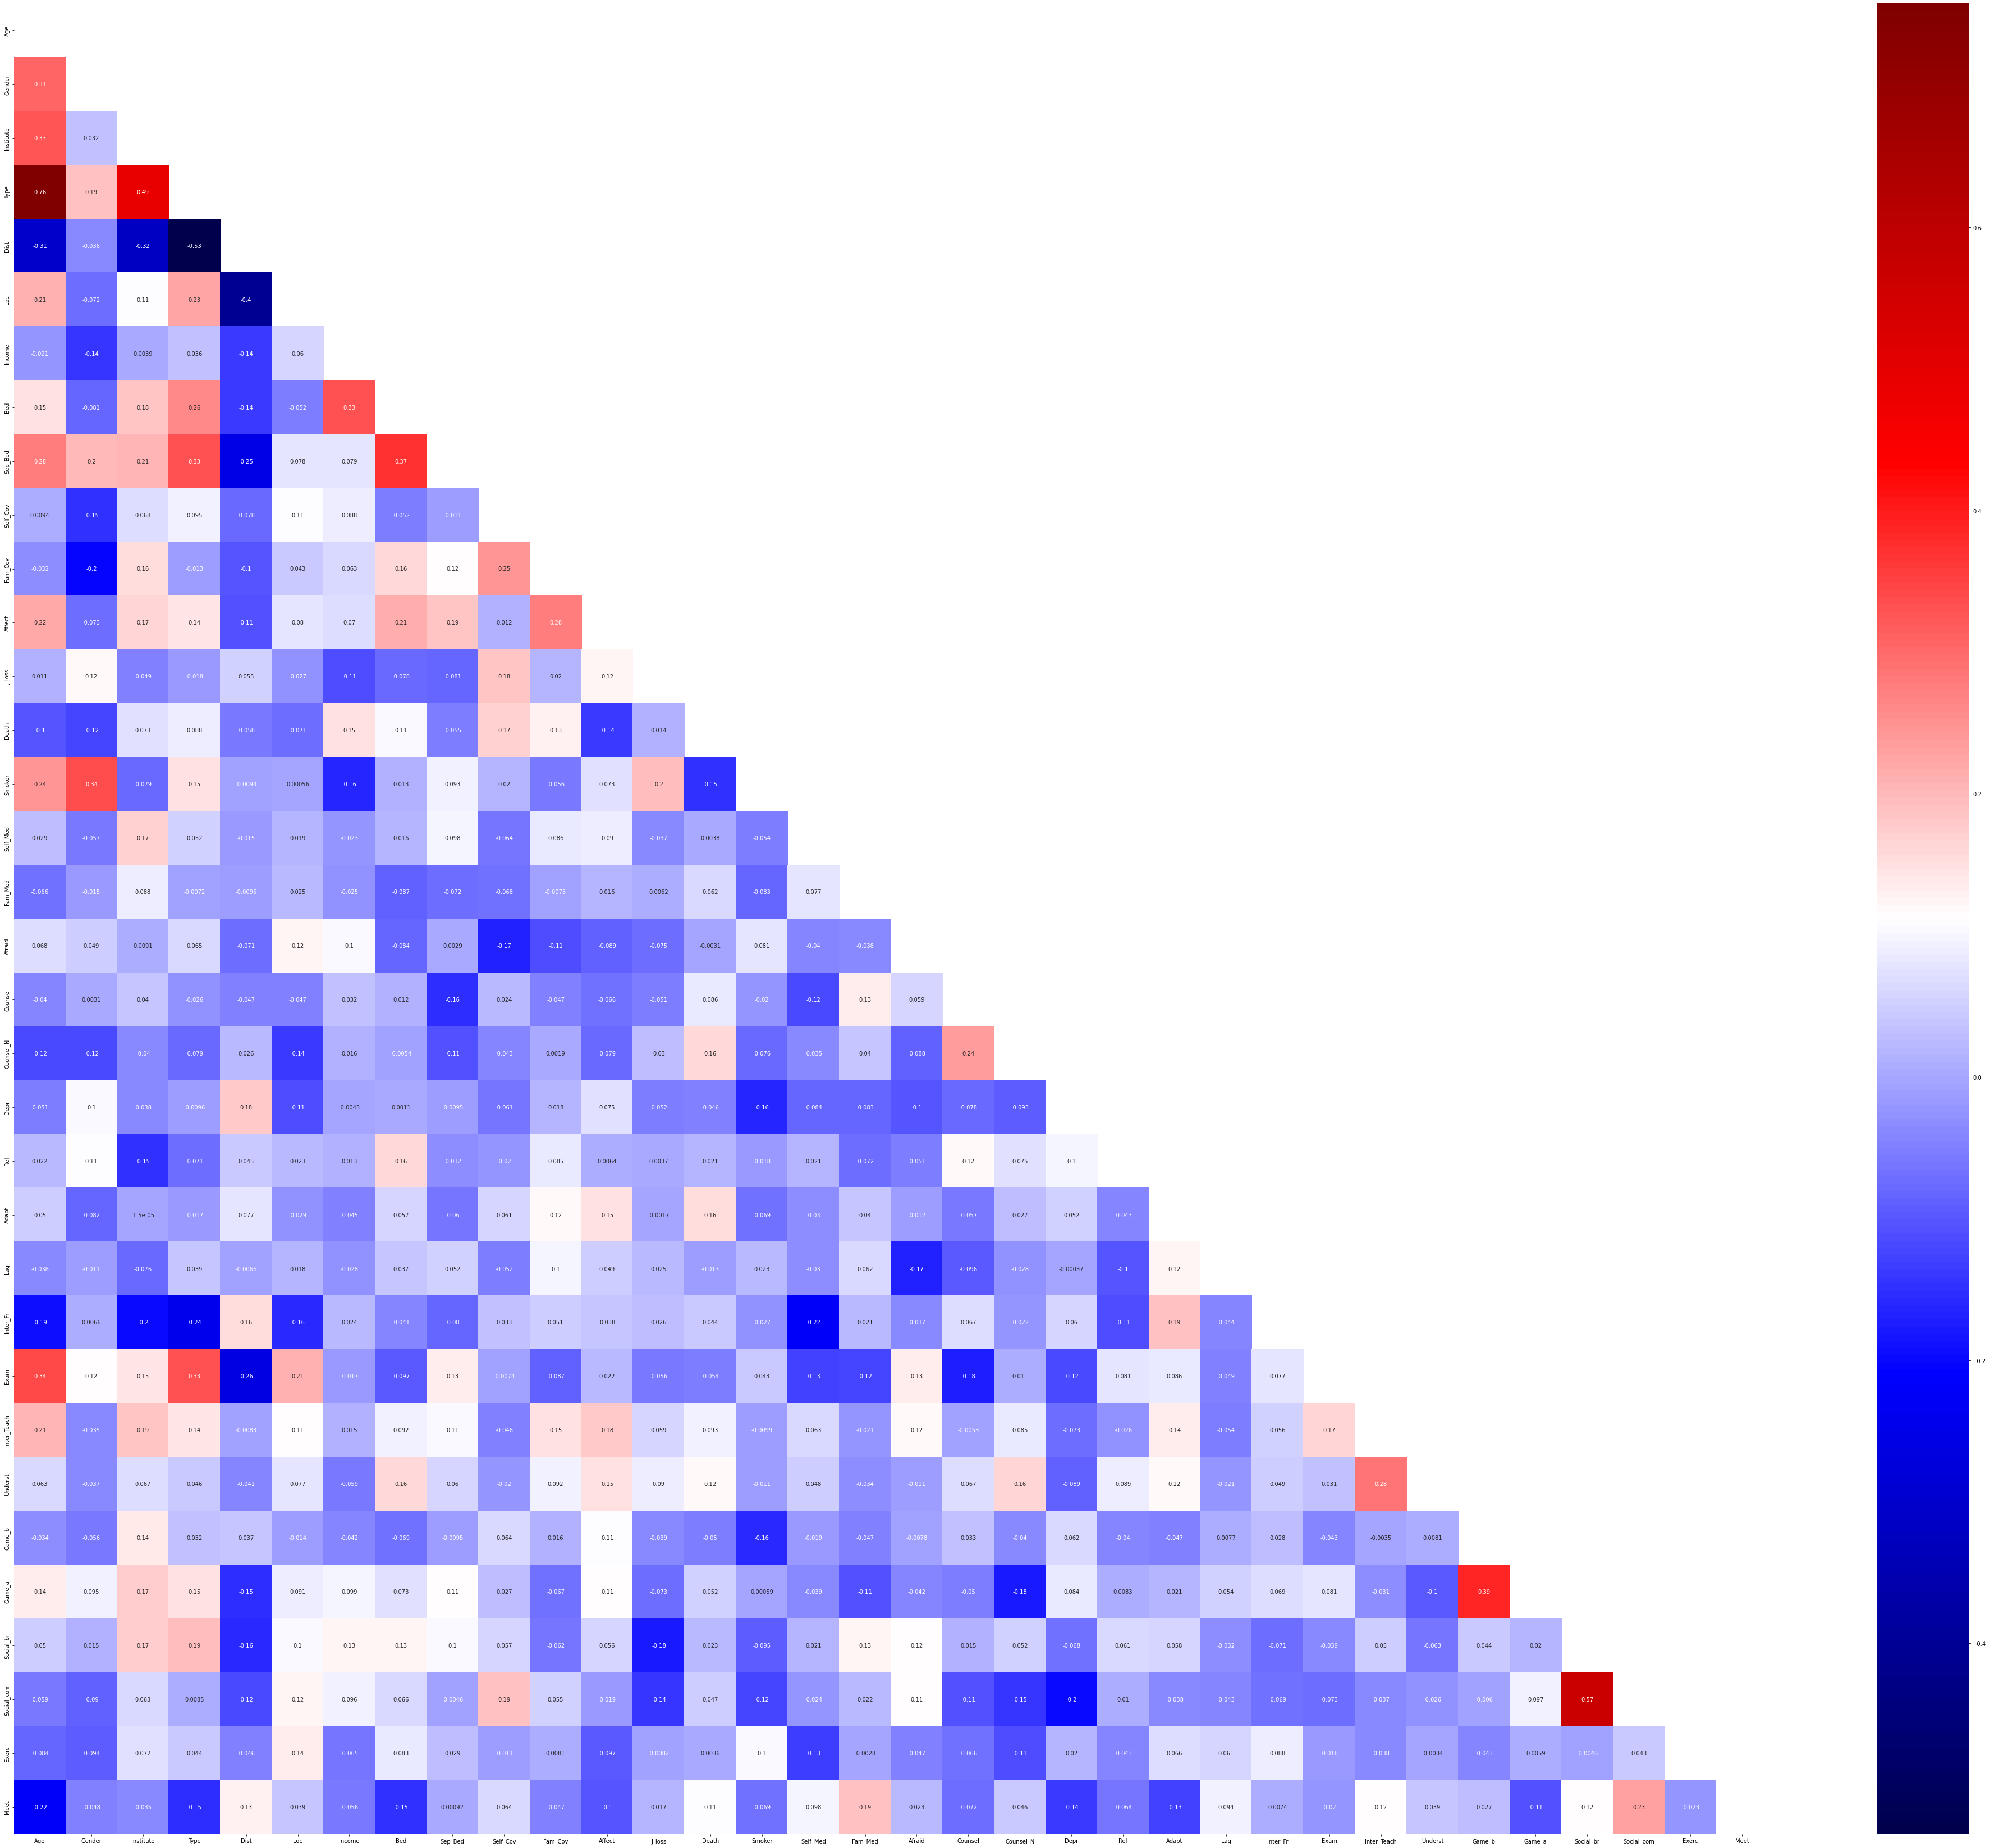

In [ ]:
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (70,60))
heat_map = sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask1);
fig = heat_map.get_figure()
fig.savefig("out.png") 

In [ ]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if(abs(corr_matrix.iloc[i, j])) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr


In [ ]:
corr_features = correlation(X_train, 0.7) # already .9, .8, .7 and .6 have chacked
print(len(corr_features))
print(corr_features)

1
{'Type'}


#Hyperparameter using GridSearchCV

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params': {
            'C': [1,10,20,30],
            'kernel':['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1,5,10,20,50,100,200],
            'random_state': [3,5,6,8],
            'criterion': ['gini','entropy']
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver = 'liblinear', multi_class ='auto'),
        'params': {
            'C': [1,5,10,15,20,30],
            'random_state': [3,5,8,10]
#             'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] 
        }
    },
    'KNN' : {
        'model': KNeighborsClassifier(algorithm = 'auto', weights='uniform'),
        'params': {
            'n_neighbors': [5,10,15,20],
            'algorithm':['auto','ball_tree','kd_tree','brute'],
            'weights': ['uniform','distance']
        }
    },
#     'Naive_Bayes':{
#         'model': GaussianNB()
#     },
#     'Multinomial_Naive_Bayes':{
#         'model': MultinomialNB()
#     },
    'Decision_Tree': {
        'model' : DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            'splitter': ['best','random']
        }
    },
    'LightGBM':{
        'model': lightgbm.LGBMClassifier(),
        'params': {
            'random_state': [5, 10, 15, 20, 40, 42, 50, 60],
            'max_depth' : [-1, -5, -2]
          
        }
    }
}

## HyperParameter Tuning for Predicting Depression Level

In [ ]:
# X_train_dep, X_test_dep, y_train_dep, y_test_dep
# for loop which will go through each of the dict values and will use GridSearchCV
scores_dep = [] #append the scores in this list

for model_name, mp in model_params.items():
    clf1 = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf1.fit(X_dep, y_dep)
    scores_dep.append({
        'model': model_name,
        'best_score': clf1.best_score_,
        'best_params': clf1.best_params_
    })


In [ ]:
# df = pd.DataFrame(X_anx, columns = iris.feature_names)
df_clf = pd.DataFrame(scores_dep,columns=['model','best_score','best_params'])
df_clf

,model,best_score,best_params
0,svm,0.376577,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.321922,"{'criterion': 'gini', 'n_estimators': 50, 'ran..."
2,logistic_regression,0.333333,"{'C': 15, 'random_state': 3}"
3,KNN,0.343544,"{'algorithm': 'auto', 'n_neighbors': 15, 'weig..."
4,Decision_Tree,0.268018,"{'criterion': 'gini', 'splitter': 'best'}"
5,LightGBM,0.294595,"{'max_depth': -1, 'random_state': 5}"


# Predicting Depression using Best Hyperparameters

## SVM (Depression)

In [ ]:
model_svm_dep = svm.SVC(kernel = 'rbf', C = 1)
svm_dep_metric = model_svm_dep.fit(X_train_dep, y_train_dep)
model_svm_dep.score(X_test_dep, y_test_dep)
# X_train_dep, X_test_dep, y_train_dep, y_test_dep

0.35135135135135137

In [ ]:
y_pred = svm_dep_metric.predict(X_test_dep)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test_anx, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test_anx, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test_anx,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[9 0 0 2 2]
 [3 1 0 0 4]
 [2 0 0 0 3]
 [2 0 0 2 7]
 [0 0 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.69      0.62        13
           1       1.00      0.12      0.22         8
           2       0.00      0.00      0.00         5
           3       0.50      0.18      0.27        11
           4       0.00      0.00      0.00         0

    accuracy                           0.32        37
   macro avg       0.41      0.20      0.22        37
weighted avg       0.56      0.32      0.35        37

Accuracy: 0.32432432432432434


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

## Decision Tree (Depression)

In [ ]:
model_dt_dep = DecisionTreeClassifier(criterion = 'gini', splitter = 'best')
DT_dep_metric = model_dt_dep.fit(X_train_dep, y_train_dep)
model_dt_dep.score(X_test_dep, y_test_dep)

0.1891891891891892

In [ ]:
y_pred = DT_dep_metric.predict(X_test_dep)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test_anx, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test_anx, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test_anx,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[5 0 1 3 4]
 [1 1 1 2 3]
 [1 0 1 1 2]
 [3 1 1 1 5]
 [0 0 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.38      0.43        13
           1       0.50      0.12      0.20         8
           2       0.25      0.20      0.22         5
           3       0.14      0.09      0.11        11
           4       0.00      0.00      0.00         0

    accuracy                           0.22        37
   macro avg       0.28      0.16      0.19        37
weighted avg       0.36      0.22      0.26        37

Accuracy: 0.21621621621621623


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest (Depresssion)


In [ ]:
model_RF_dep = RandomForestClassifier(criterion='entropy', n_estimators = 50, random_state = 6 )
RF_dep_metric = model_RF_dep.fit(X_train_dep, y_train_dep)
model_RF_dep.score(X_test_dep, y_test_dep)

0.35135135135135137

In [ ]:
y_pred = RF_dep_metric.predict(X_test_dep)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test_anx, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test_anx, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test_anx,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[8 0 0 1 4]
 [3 1 2 1 1]
 [2 0 0 0 3]
 [2 0 0 4 5]
 [0 0 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.62      0.57        13
           1       1.00      0.12      0.22         8
           2       0.00      0.00      0.00         5
           3       0.67      0.36      0.47        11
           4       0.00      0.00      0.00         0

    accuracy                           0.35        37
   macro avg       0.44      0.22      0.25        37
weighted avg       0.60      0.35      0.39        37

Accuracy: 0.35135135135135137


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Logistic Regression (Depression)

In [ ]:
model_logReg_dep = LogisticRegression(C = 1, random_state = 3)
logReg_dep_metric = model_logReg_dep.fit(X_train_dep, y_train_dep)
model_logReg_dep.score(X_test_dep, y_test_dep)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.2972972972972973

In [ ]:
y_pred = logReg_dep_metric.predict(X_test_dep)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test_anx, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test_anx, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test_anx,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[7 0 0 3 3]
 [3 1 1 1 2]
 [2 0 0 0 3]
 [2 0 1 3 5]
 [0 0 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.54      0.52        13
           1       1.00      0.12      0.22         8
           2       0.00      0.00      0.00         5
           3       0.43      0.27      0.33        11
           4       0.00      0.00      0.00         0

    accuracy                           0.30        37
   macro avg       0.39      0.19      0.21        37
weighted avg       0.52      0.30      0.33        37

Accuracy: 0.2972972972972973


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## LGBM (Depression)

In [ ]:
model_LGBM_dep = lightgbm.LGBMClassifier(max_depth=-1,random_state=5)
LGBM_dep_metric = model_LGBM_dep.fit(X_train_dep,y_train_dep)
model_LGBM_dep.score(X_test_dep, y_test_dep)

# X_train_anx, X_test_anx, y_train_anx, y_test_anx 

0.24324324324324326

In [ ]:
y_pred = LGBM_dep_metric.predict(X_test_dep)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test_anx, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test_anx, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test_anx,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[7 0 0 2 4]
 [1 1 2 0 4]
 [2 0 1 0 2]
 [2 0 1 4 4]
 [0 0 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.54      0.56        13
           1       1.00      0.12      0.22         8
           2       0.25      0.20      0.22         5
           3       0.67      0.36      0.47        11
           4       0.00      0.00      0.00         0

    accuracy                           0.35        37
   macro avg       0.50      0.25      0.30        37
weighted avg       0.65      0.35      0.41        37

Accuracy: 0.35135135135135137


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNN (Depression)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_dep)
X_train_dep = scaler.transform(X_train_dep)
X_test_dep = scaler.transform(X_test_dep)



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN_dep = KNeighborsClassifier(n_neighbors = 15, weights = 'distance', algorithm = 'auto')
KNN_dep_metric = model_KNN_dep.fit(X_train_dep, y_train_dep)
model_KNN_dep.score(X_test_dep, y_test_dep)



0.35135135135135137

In [ ]:
y_pred = KNN_dep_metric.predict(X_test_dep)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test_anx, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test_anx, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test_anx,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[9 0 0 1 3]
 [3 1 1 1 2]
 [2 0 1 1 1]
 [1 0 0 8 2]
 [0 0 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.69      0.64        13
           1       1.00      0.12      0.22         8
           2       0.50      0.20      0.29         5
           3       0.73      0.73      0.73        11
           4       0.00      0.00      0.00         0

    accuracy                           0.51        37
   macro avg       0.57      0.35      0.38        37
weighted avg       0.71      0.51      0.53        37

Accuracy: 0.5135135135135135


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## HyperParameter Tuning for Predicting Anxiety Level

In [ ]:
# for loop which will go through each of the dict values and will use GridSearchCV
scores = [] #append the scores in this list

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X_anx, y_anx)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

    # X_train, X_test, y_train, y_test


In [ ]:
# df = pd.DataFrame(X_anx, columns = iris.feature_names)
df_clf = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_clf

,model,best_score,best_params
0,svm,0.426727,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.415616,"{'criterion': 'gini', 'n_estimators': 100, 'ra..."
2,logistic_regression,0.404955,"{'C': 1, 'random_state': 3}"
3,KNN,0.410511,"{'algorithm': 'auto', 'n_neighbors': 20, 'weig..."
4,Decision_Tree,0.360511,"{'criterion': 'gini', 'splitter': 'best'}"
5,LightGBM,0.355856,"{'max_depth': -1, 'random_state': 5}"


# Predicting Anxiety using best hyperparamaters

## Decision Tree (Anxiety)

In [ ]:
model_dt = DecisionTreeClassifier(criterion = 'gini', splitter = 'best')
DT_metric = model_dt.fit(X_train_anx, y_train_anx)
model_dt.score(X_test_anx, y_test_anx)

0.13513513513513514

In [ ]:
y_pred = DT_metric.predict(X_test_anx)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test_anx, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test_anx, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test_anx,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[0 5 4 4]
 [1 2 2 3]
 [1 1 0 3]
 [5 1 2 3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.22      0.25      0.24         8
           2       0.00      0.00      0.00         5
           3       0.23      0.27      0.25        11

    accuracy                           0.14        37
   macro avg       0.11      0.13      0.12        37
weighted avg       0.12      0.14      0.13        37

Accuracy: 0.13513513513513514


## Random Forest (Anxiety)

In [ ]:
model_RF = RandomForestClassifier(criterion='gini', n_estimators = 100, random_state = 3 )
RF_metric = model_RF.fit(X_train_anx, y_train_anx)
model_RF.score(X_test_anx, y_test_anx)

0.35135135135135137

In [ ]:
y_pred = RF_metric.predict(X_test_anx)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test_anx, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test_anx, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test_anx,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[7 2 0 4]
 [2 0 3 3]
 [3 0 0 2]
 [4 1 0 6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.54      0.48        13
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         5
           3       0.40      0.55      0.46        11

    accuracy                           0.35        37
   macro avg       0.21      0.27      0.24        37
weighted avg       0.27      0.35      0.31        37

Accuracy: 0.35135135135135137


## Logistic Regression (Anxiety)

In [ ]:
model_logReg = LogisticRegression(C = 1, random_state = 3)
logReg_metric = model_logReg.fit(X_train_anx, y_train_anx)
model_logReg.score(X_test_anx, y_test_anx)

0.40540540540540543

In [ ]:
y_pred = logReg_metric.predict(X_test_anx)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test_anx, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test_anx, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test_anx,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[7 1 2 3]
 [0 2 3 3]
 [1 1 1 2]
 [2 1 3 5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.54      0.61        13
           1       0.40      0.25      0.31         8
           2       0.11      0.20      0.14         5
           3       0.38      0.45      0.42        11

    accuracy                           0.41        37
   macro avg       0.40      0.36      0.37        37
weighted avg       0.46      0.41      0.42        37

Accuracy: 0.40540540540540543


## SVC (Anxiety)

In [ ]:
model_svm = svm.SVC(kernel = 'rbf', C = 1)
svm_metric = model_svm.fit(X_train_anx, y_train_anx)
model_svm.score(X_test_anx, y_test_anx)
# X_train_anx, X_test_anx, y_train_anx, y_test_anx 


0.5135135135135135

In [ ]:
y_pred = svm_metric.predict(X_test_anx)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test_anx, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test_anx, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test_anx,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[10  0  0  3]
 [ 4  0  0  4]
 [ 3  0  0  2]
 [ 2  0  0  9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.77      0.62        13
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         5
           3       0.50      0.82      0.62        11

    accuracy                           0.51        37
   macro avg       0.26      0.40      0.31        37
weighted avg       0.33      0.51      0.40        37

Accuracy: 0.5135135135135135


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## LGBM (Anxiety)

In [ ]:
model_LGBM = lightgbm.LGBMClassifier(max_depth=1,random_state=5)
LGBM_metric = model_LGBM.fit(X_train_anx,y_train_anx)
model_LGBM.score(X_test_anx, y_test_anx)

# X_train_anx, X_test_anx, y_train_anx, y_test_anx 

0.40540540540540543

In [ ]:
y_pred = LGBM_metric.predict(X_test_anx)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test_anx, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test_anx, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test_anx,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[7 2 2 2]
 [3 0 2 3]
 [2 0 0 3]
 [2 0 1 8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.54      0.52        13
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         5
           3       0.50      0.73      0.59        11

    accuracy                           0.41        37
   macro avg       0.25      0.32      0.28        37
weighted avg       0.32      0.41      0.36        37

Accuracy: 0.40540540540540543


In [ ]:
print('Training accuracy {:.4f}'.format(model_LGBM.score(X_train_anx,y_train_anx)))
print('Testing accuracy {:.4f}'.format(model_LGBM.score(X_test_anx,y_test_anx)))

Training accuracy 0.6301
Testing accuracy 0.4054


## KNN (Anxiety)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_anx)
X_train_anx = scaler.transform(X_train_anx)
X_test_anx = scaler.transform(X_test_anx)



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors = 20, weights = 'distance', algorithm = 'auto')
KNN_metric = model_KNN.fit(X_train_anx, y_train_anx)
model_KNN.score(X_test_anx, y_test_anx)



0.5135135135135135

In [ ]:
y_pred = KNN_metric.predict(X_test_anx)



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test_anx, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test_anx, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test_anx,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[10  1  1  1]
 [ 2  1  2  3]
 [ 4  0  0  1]
 [ 3  0  0  8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.77      0.62        13
           1       0.50      0.12      0.20         8
           2       0.00      0.00      0.00         5
           3       0.62      0.73      0.67        11

    accuracy                           0.51        37
   macro avg       0.41      0.41      0.37        37
weighted avg       0.48      0.51      0.46        37

Accuracy: 0.5135135135135135


SVM


In [ ]:
from sklearn import svm
model = svm.SVC(kernel = 'rbf', C = 30, gamma = 'auto')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.40540540540540543

LighBGM


In [ ]:
import lightgbm
from sklearn import metrics
from sklearn.metrics import precision_score

In [ ]:
model_LGBM_ANX2 = lightgbm.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model_LGBM_ANX2.fit(X_train_anx,y_train_anx,eval_set=[(X_test_anx,y_test_anx),(X_train_anx,y_train_anx)],
          verbose=20,eval_metric='logloss')

[20]	training's multi_logloss: 0.960409	training's multi_logloss: 0.960409	valid_0's multi_logloss: 1.26424	valid_0's multi_logloss: 1.26424
[40]	training's multi_logloss: 0.745076	training's multi_logloss: 0.745076	valid_0's multi_logloss: 1.29625	valid_0's multi_logloss: 1.29625
[60]	training's multi_logloss: 0.595899	training's multi_logloss: 0.595899	valid_0's multi_logloss: 1.35817	valid_0's multi_logloss: 1.35817
[80]	training's multi_logloss: 0.481181	training's multi_logloss: 0.481181	valid_0's multi_logloss: 1.42404	valid_0's multi_logloss: 1.42404
[100]	training's multi_logloss: 0.393628	training's multi_logloss: 0.393628	valid_0's multi_logloss: 1.46214	valid_0's multi_logloss: 1.46214


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [ ]:
print('Training accuracy {:.4f}'.format(model_LGBM_ANX2.score(X_train_anx,y_train_anx)))
print('Testing accuracy {:.4f}'.format(model_LGBM_ANX2.score(X_test_anx,y_test_anx)))

Training accuracy 0.9863
Testing accuracy 0.2973


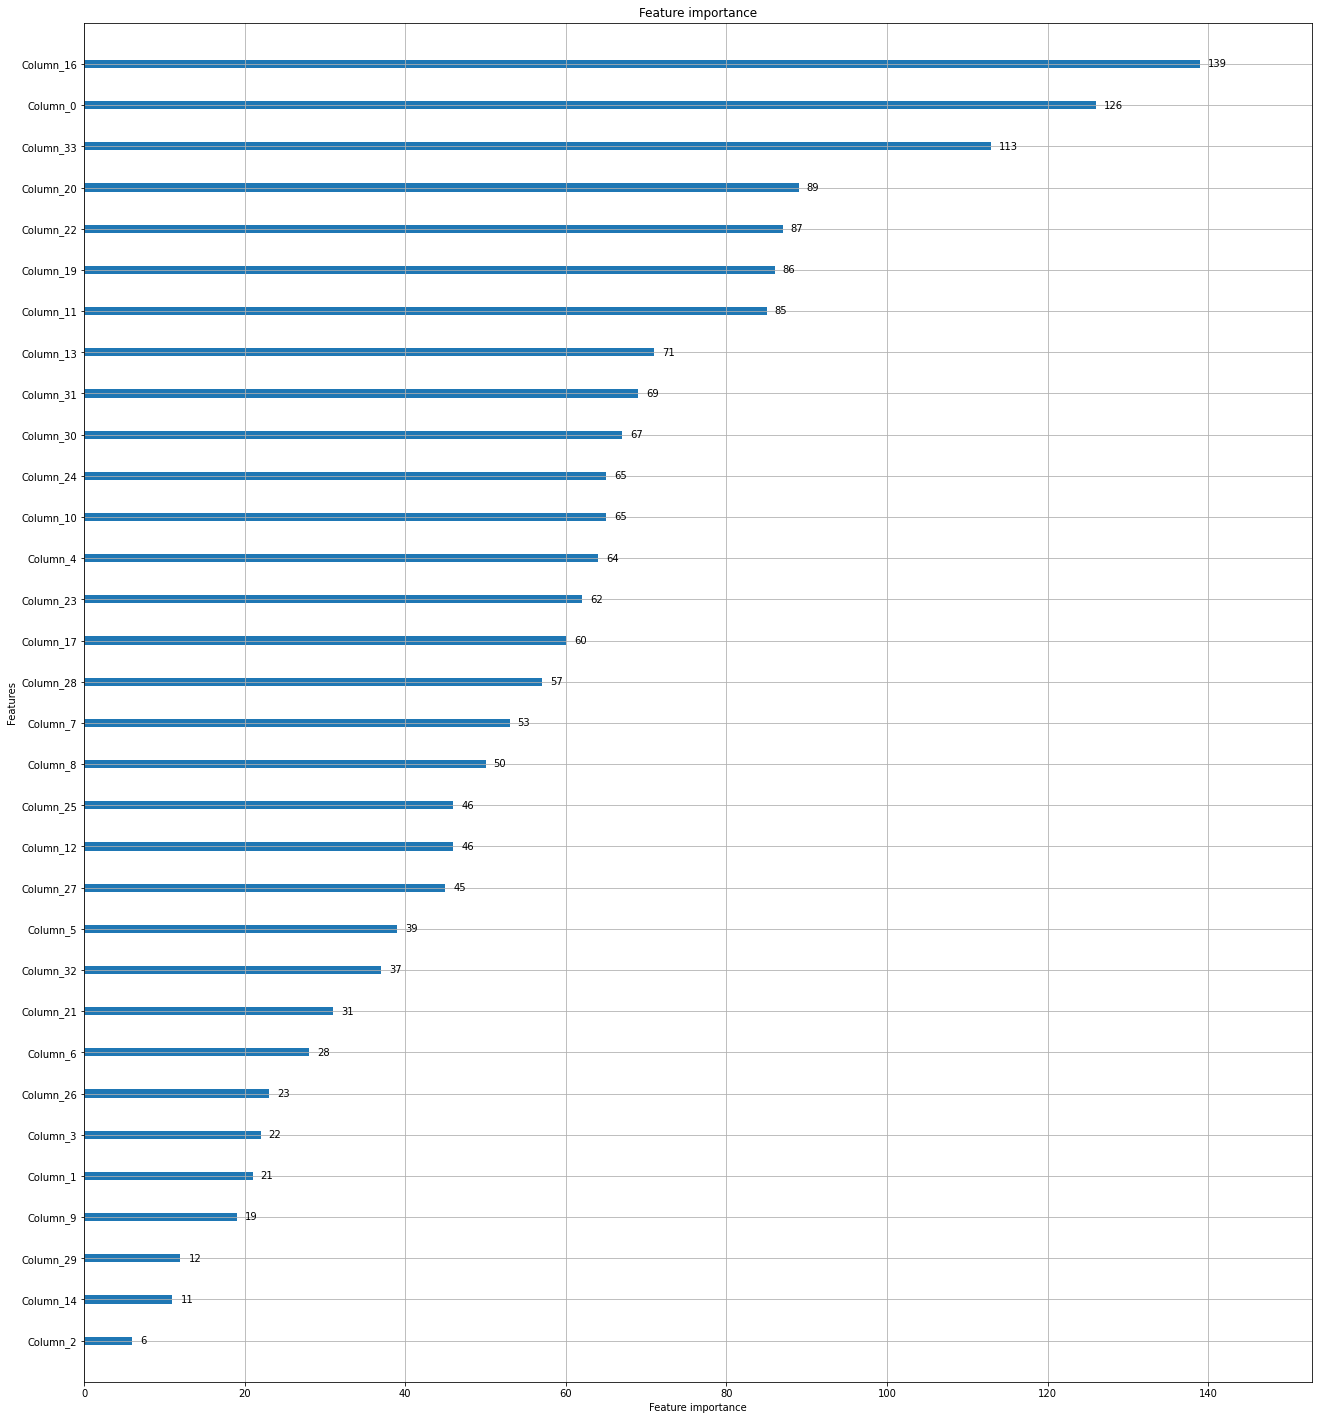

In [ ]:
lightgbm.plot_importance(model).figure.set_size_inches(22, 25)

KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[7 0 0 1 1]
 [1 1 1 0 1]
 [3 2 1 1 0]
 [3 0 0 3 2]
 [2 1 1 5 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.78      0.56         9
           1       0.25      0.25      0.25         4
           2       0.33      0.14      0.20         7
           3       0.30      0.38      0.33         8
           4       0.00      0.00      0.00         9

    accuracy                           0.32        37
   macro avg       0.26      0.31      0.27        37
weighted avg       0.26      0.32      0.27        37

Accuracy: 0.32432432432432434


**Predict Drepression**

# Data Visualization


In [ ]:
df_final.head()

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,In_which_platform_you_interact_better_with_teachers?,In_which_platform_do_you_understand_better?_,How_much_did_you_play_computer/mobile/video_games_before_the_reopening_of_your_institution?__,How_much_do_you_play_computer/mobile/video_games_now?,Amount_of_Social_Media_browsing_(News_Feed__YouTube__TikTok__Instagram__etc_)_in_the_past_week?,Amount_of_Social_Media_communication_(Messenger__WhatsApp__Telegram__etc_)_in_the_past_week?_,Physical_Exercise_in_the_past_week?_,Meeting_with_friends_or_relatives_in_the_past_week?_,depression_level,Anxiety_level
0,15,Female,Viqarunnisa Noon School And College,School,Dhaka,Urban,Middle class,3 bedrooms,Yes,No,...,Offline,Offline,None,None,Extreme (more than 1 hour per day),Extreme (more than 1 hour per day),Daily,More times,Mild depression,Minimal anxiety
1,16,Female,Motijheel Govt Girls High School,School,Dhaka,Urban,Middle class,2 bedrooms,No,No,...,Online,Online,Slightly,Slightly,Moderately (31-60 mins per day),Moderately (31-60 mins per day),Slightly,4-7 times,Minimal depression,Minimal anxiety
2,17,Male,Birshreshtha Munshi Abdur Rouf Public College,College,Dhaka,Urban,Prefer Not to say,2 bedrooms,Yes,No,...,Both,Both,Moderately,Moderately,Moderately (31-60 mins per day),Moderately (31-60 mins per day),None,None,Moderately severe depression,Moderate anxiety
3,17,Male,Scholar's School and College,College,Dhaka,Urban,Upper-Middle class,3 bedrooms,Yes,Maybe,...,Offline,None,Extreme,Extreme,Extreme (more than 1 hour per day),Extreme (more than 1 hour per day),Moderately,4-7 times,Severe depression,Severe anxiety
4,17,Male,Noakhali Government college,College,Noakhali,Upazila,Middle class,4 bedrooms or greater,Yes,No,...,Both,Offline,Extreme,Moderately,Extreme (more than 1 hour per day),Extreme (more than 1 hour per day),Slightly,4-7 times,Severe depression,Severe anxiety


In [ ]:
temp = df_final
features = temp.columns.values.tolist()
print(features)

['Your_Age', 'Your_Gender', 'Name_of_your_Educational_Institution', 'Institution_Type', 'District_where_you_stayed_when_education_institutions_were_closed_for_Covid19', 'Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19', 'What_is_your_Family_Income_Status?', 'Number_of_bedrooms_in_your_house?', 'Do_you_have_a_separate_bedroom?', 'Were_you_ever_infected_by_Covid19?', 'Has_anyone_in_your_family_ever_been_infected_by_Covid19?__', 'If_you_or_your_family_had_been_ever_infected_by_Covid19__how_much_did_it_affect_your_mental_health_during_that_time?_', 'Had_any_of_your_family_members_(including_yourself)_lost_their_job_or_business_due_to_Covid19?', 'With_all_the_deaths_due_to_Covid19_around_us_in_general__how_much_did_it_affect_your_mental_health?', 'Are_you_a_smoker?', 'Do_you_have_any_underlying_medical_condition?_', 'Do_any_of_your_family_members_have_any_underlying_medical_conditions?', 'Are_you_afraid_of_getting_infected_by_Covid19?_', 'Did_

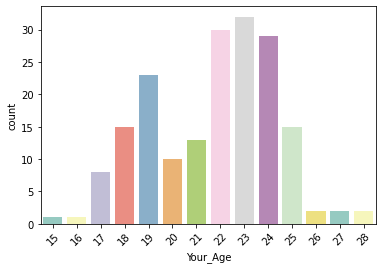

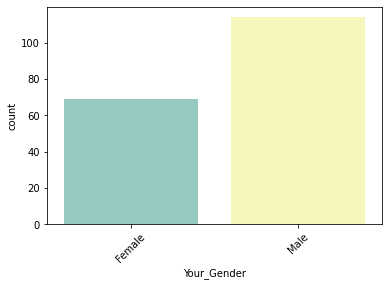

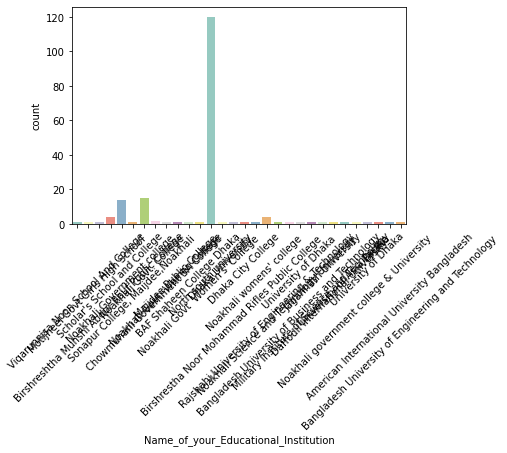

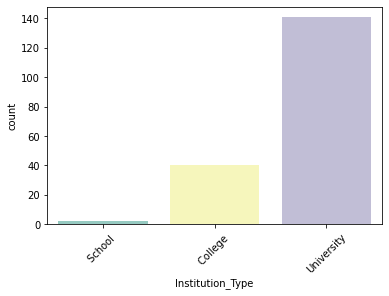

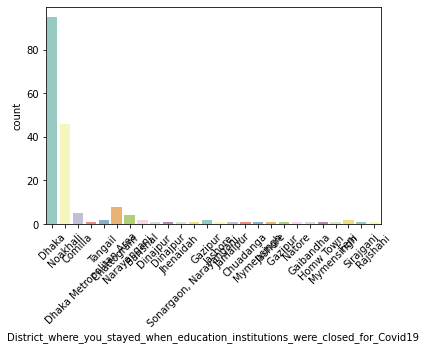

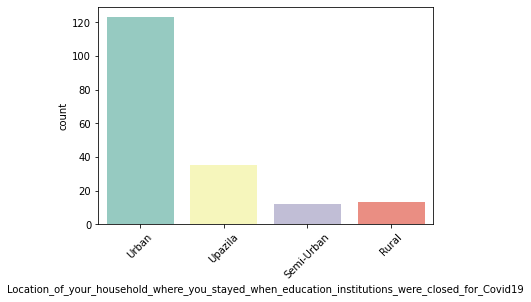

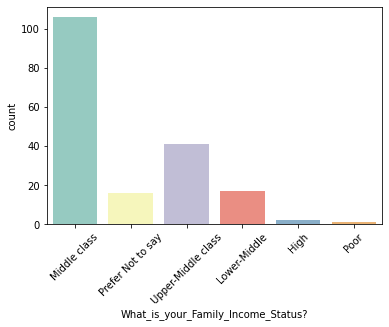

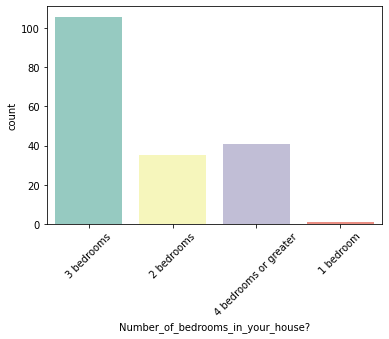

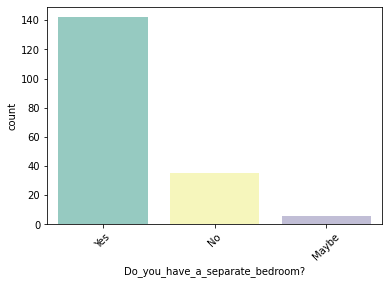

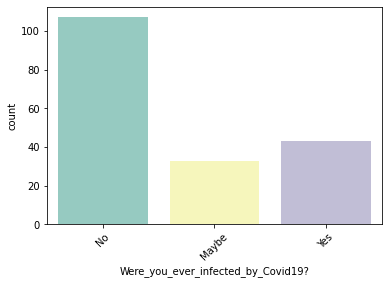

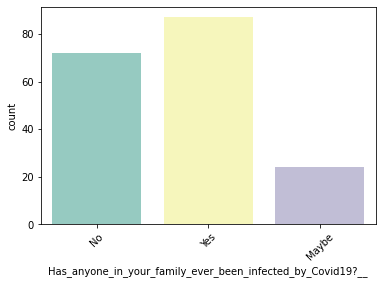

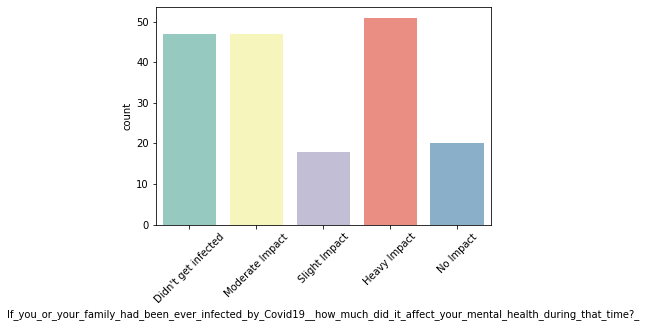

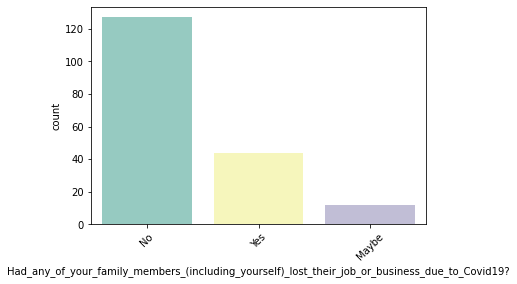

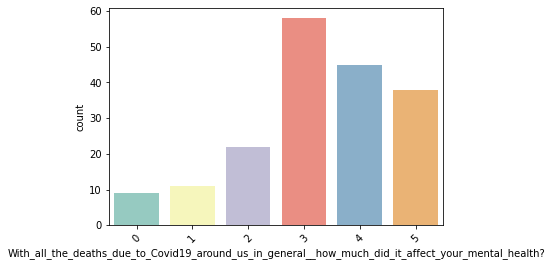

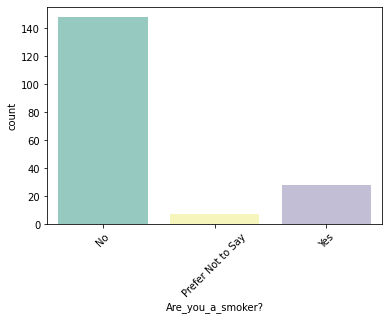

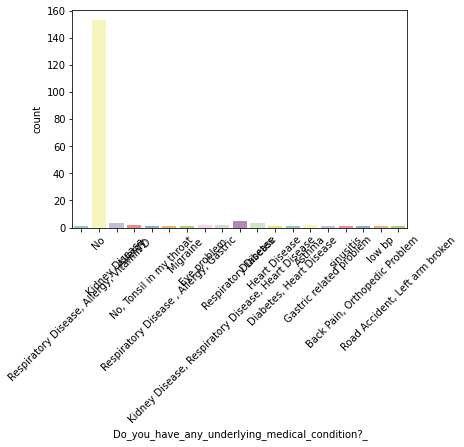

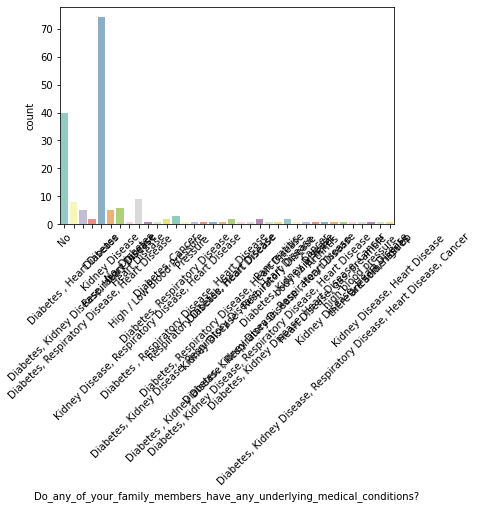

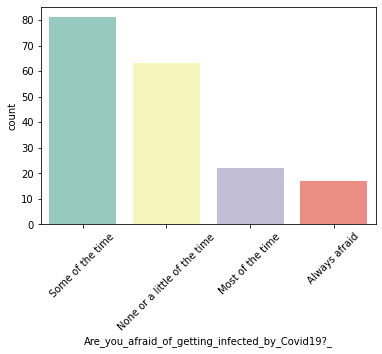

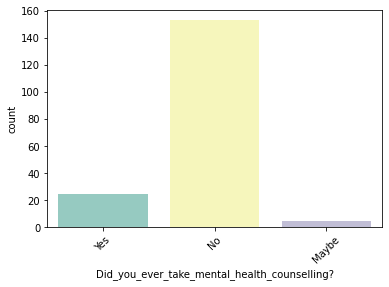

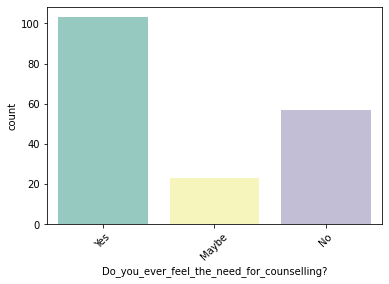

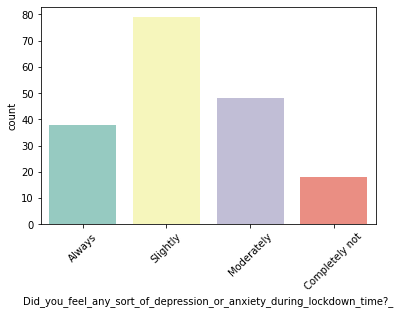

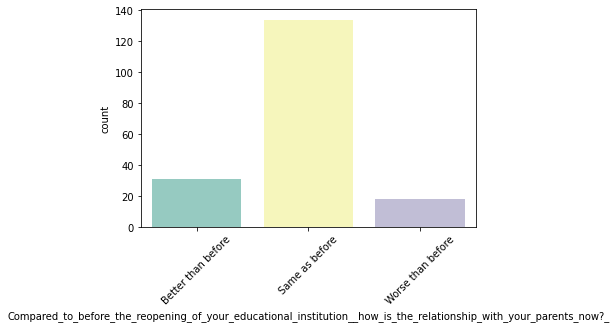

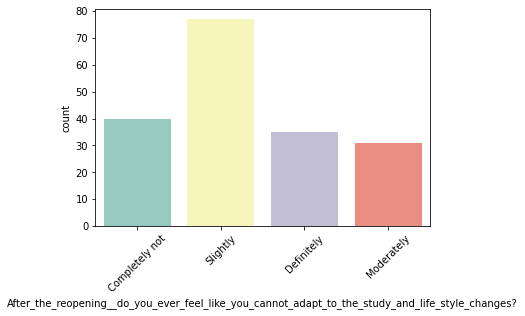

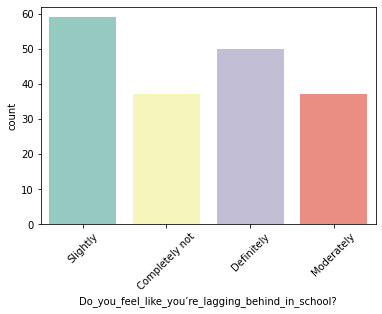

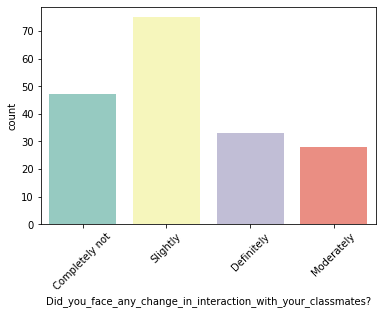

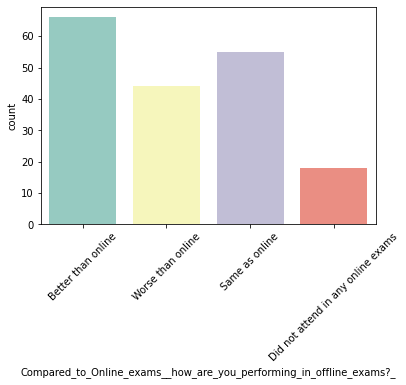

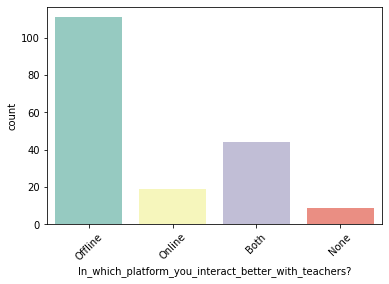

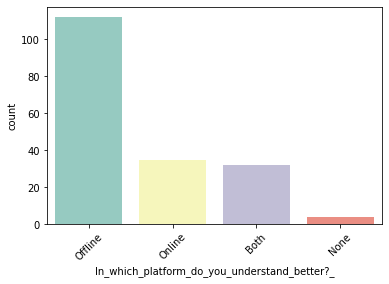

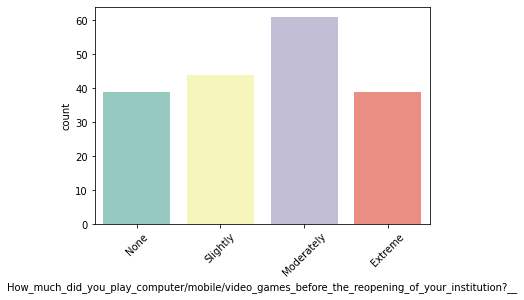

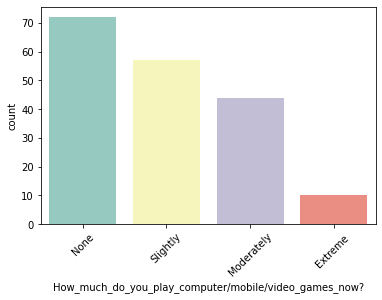

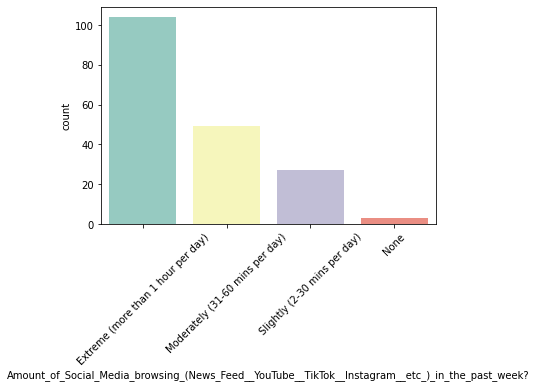

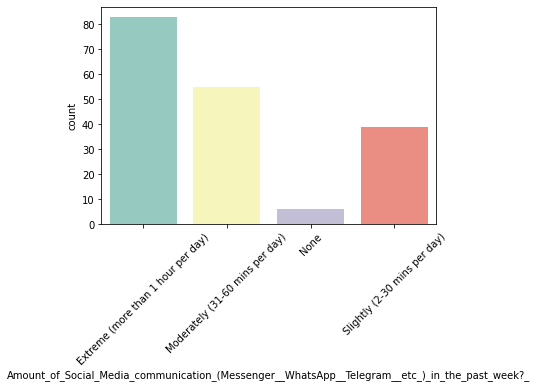

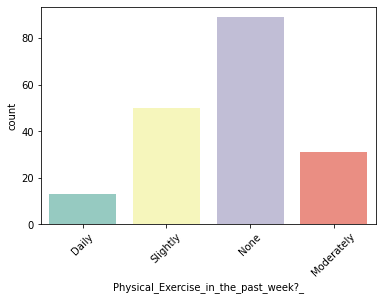

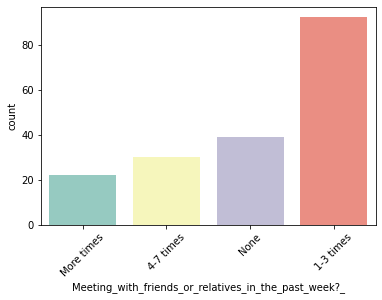

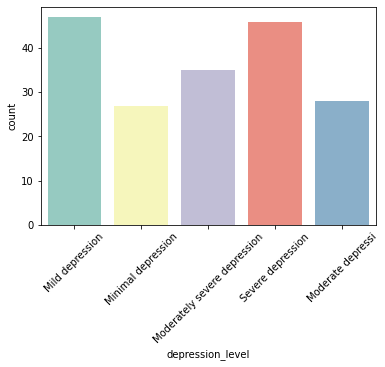

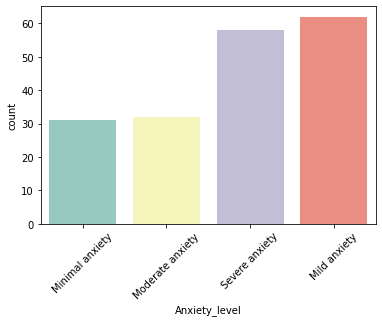

In [ ]:
 #Looping through all the features and plotting bar chart of each of the categorical features


for f in features:
    sns.countplot(x = f, data = df_final, palette = 'Set3')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
Age_df = df_final['Your_Age'].value_counts().rename_axis('sub_cat_values').reset_index(name='counts')
Age_df.head()


,sub_cat_values,counts
0,23,32
1,22,30
2,24,29
3,19,23
4,18,15


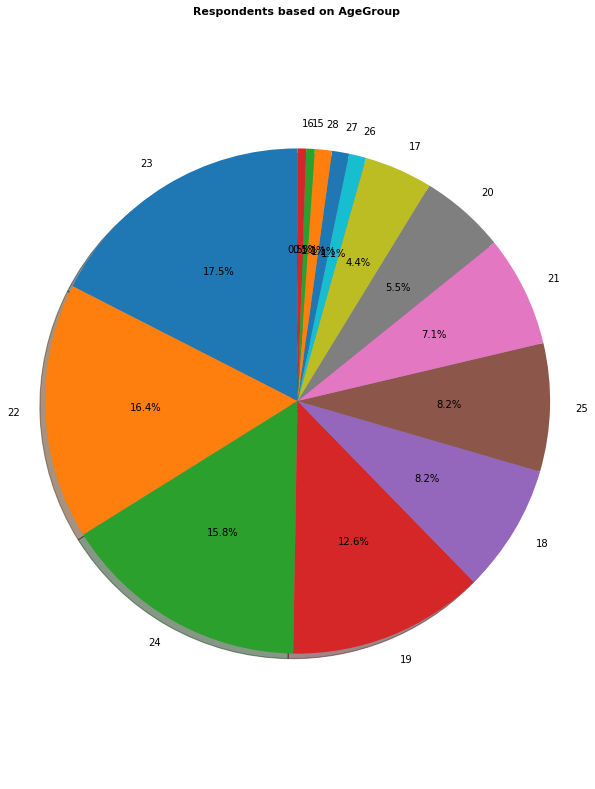

In [ ]:
# Pie chart
labels = Age_df.sub_cat_values
Age_Class = df_final.groupby('Your_Age').count()
sizes = Age_df.counts

fig1, ax1 = plt.subplots(figsize=[10, 14])
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Respondents based on AgeGroup', fontdict={'fontsize': 11, 'fontweight': 'bold'})

# plt.legend(labels=labels)
plt.show()

In [ ]:
Edu_df = df_final['Institution_Type'].value_counts().rename_axis('sub_cat_values').reset_index(name='counts')

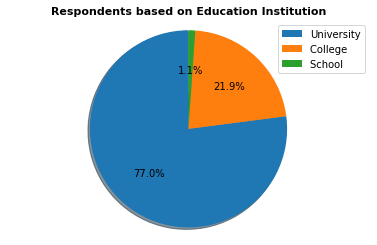

In [ ]:
labels = Edu_df.sub_cat_values
Edu_Class = df_final.groupby('Institution_Type').count()
sizes = Edu_df.counts

fig1, ax1 = plt.subplots(figsize=[6.5, 4])
ax1.pie(sizes, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Respondents based on Education Institution', fontdict={'fontsize': 11, 'fontweight': 'bold'})

plt.legend(labels=labels,loc="upper right")
plt.show()

In [ ]:
sex_df = df_final['Your_Gender'].value_counts().rename_axis('sub_cat_values').reset_index(name='counts')

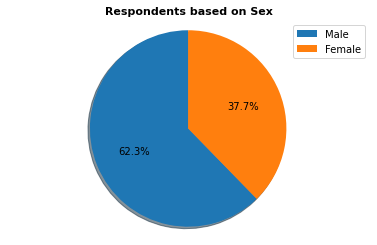

In [ ]:
labels = sex_df.sub_cat_values
# Edu_Class = df_final.groupby('Your_Gender').count()
sizes = sex_df.counts

fig1, ax1 = plt.subplots(figsize=[6.5, 4])
ax1.pie(sizes, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Respondents based on Sex', fontdict={'fontsize': 11, 'fontweight': 'bold'})

plt.legend(labels=labels,loc="upper right")
plt.show()

In [ ]:
loc_df = df_final['Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19'].value_counts().rename_axis('sub_cat_values').reset_index(name='counts')

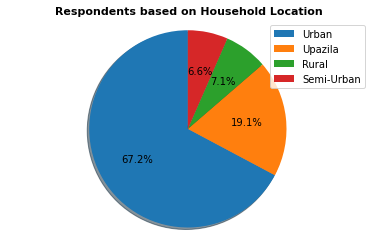

In [ ]:
labels = loc_df.sub_cat_values
loc_Class = df_final.groupby('Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19').count()
sizes = loc_df.counts

fig1, ax1 = plt.subplots(figsize=[6.5, 4])
ax1.pie(sizes, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Respondents based on Household Location', fontdict={'fontsize': 11, 'fontweight': 'bold'})

plt.legend(labels=labels,loc="upper right")
plt.show()

In [ ]:
df_final.columns

Index(['Your_Age', 'Your_Gender', 'Name_of_your_Educational_Institution',
       'Institution_Type',
       'District_where_you_stayed_when_education_institutions_were_closed_for_Covid19',
       'Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19',
       'What_is_your_Family_Income_Status?',
       'Number_of_bedrooms_in_your_house?', 'Do_you_have_a_separate_bedroom?',
       'Were_you_ever_infected_by_Covid19?',
       'Has_anyone_in_your_family_ever_been_infected_by_Covid19?__',
       'If_you_or_your_family_had_been_ever_infected_by_Covid19__how_much_did_it_affect_your_mental_health_during_that_time?_',
       'Had_any_of_your_family_members_(including_yourself)_lost_their_job_or_business_due_to_Covid19?',
       'With_all_the_deaths_due_to_Covid19_around_us_in_general__how_much_did_it_affect_your_mental_health?',
       'Are_you_a_smoker?', 'Do_you_have_any_underlying_medical_condition?_',
       'Do_any_of_your_family_members_have_any

In [ ]:
income_df = df_final['What_is_your_Family_Income_Status?'].value_counts().rename_axis('sub_cat_values').reset_index(name='counts')

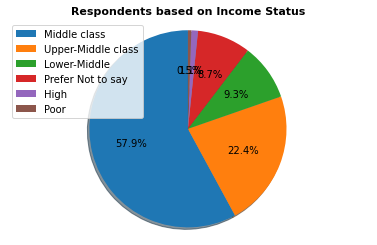

In [ ]:
labels = income_df.sub_cat_values
income_Class = df_final.groupby('What_is_your_Family_Income_Status?').count()
sizes = income_df.counts

fig1, ax1 = plt.subplots(figsize=[6.5, 4])
ax1.pie(sizes, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Respondents based on Income Status', fontdict={'fontsize': 11, 'fontweight': 'bold'})

plt.legend(labels=labels,loc="upper left")
plt.show()

# BoxPlot of Depression level according to Age in Different Types of Location in BD:

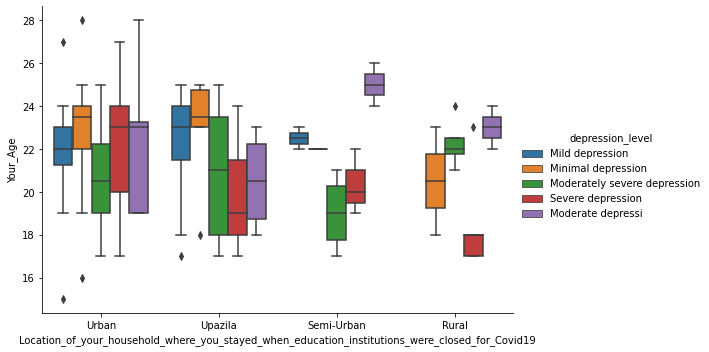

In [ ]:

ax = sns.catplot(x="Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19", y="Your_Age", hue="depression_level", kind="box", data=df_final, height=5, aspect=1.5)

# BoxPlot of Anxiety Level according to Age in Different Types of Location in BD:

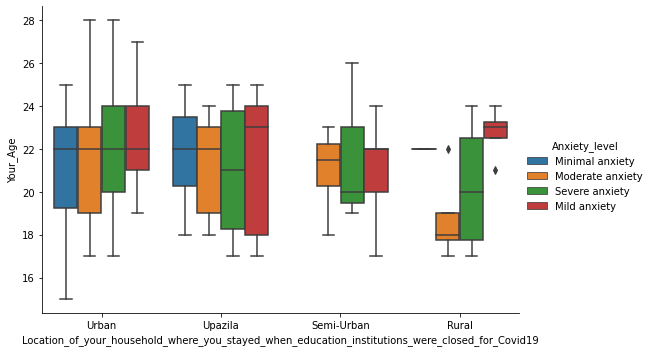

In [ ]:
ax = sns.catplot(x="Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19", y="Your_Age", hue="Anxiety_level", kind="box", data=df_final, height=5, aspect=1.5)

# BoxPlot of Depression according to Age for different types of Education Institiutes:

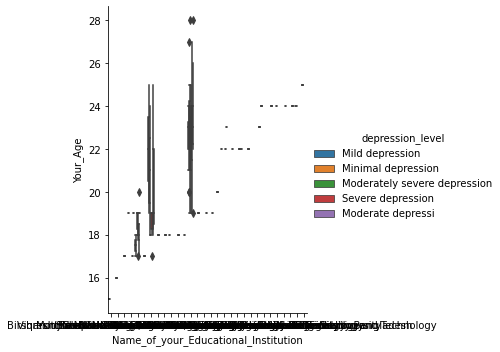

In [ ]:
ax = sns.catplot(x="Name_of_your_Educational_Institution", y="Your_Age", hue="depression_level", kind="box", data=df_final)

# BoxPlot of Depression according to Age for different types of Education Institiutes:

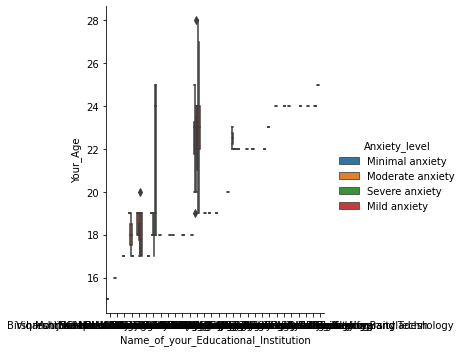

In [ ]:
ax = sns.catplot(x="Name_of_your_Educational_Institution", y="Your_Age", hue="Anxiety_level", kind="box", data=df_final)

# Violinplots of Depression Level according to Age in based on if the Individual was Affected by Covid19 or not:

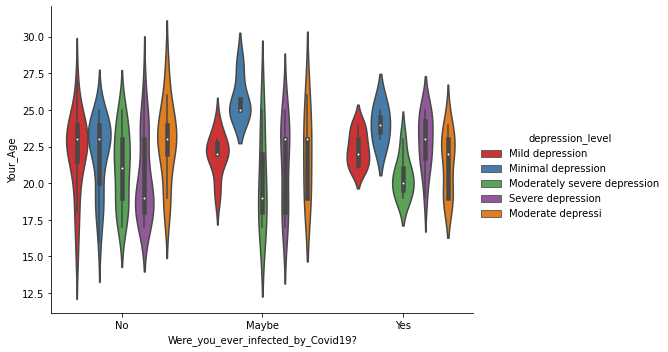

In [ ]:
sns.catplot(x="Were_you_ever_infected_by_Covid19?", y="Your_Age", hue="depression_level",
            kind="violin", split=False, data=df_final, palette="Set1", height=5, aspect=1.4)

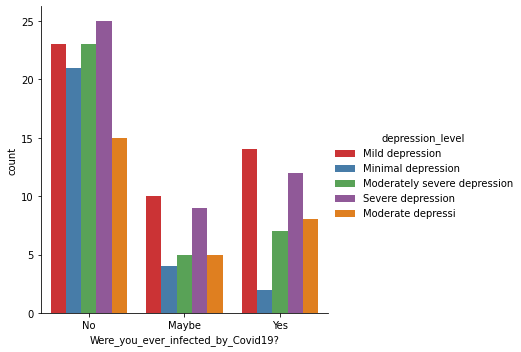

In [ ]:
sns.catplot(x="Were_you_ever_infected_by_Covid19?", hue="depression_level",
            kind="count", data=df_final, palette="Set1")

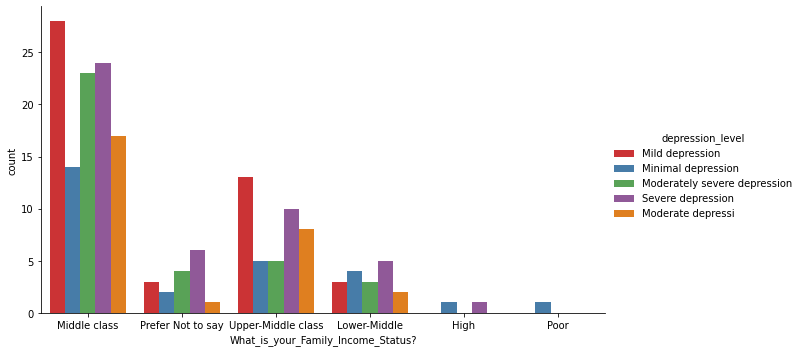

In [ ]:
sns.catplot(x="What_is_your_Family_Income_Status?", hue="depression_level",
            kind="count", data=df_final, palette="Set1", height=5, aspect=1.75)

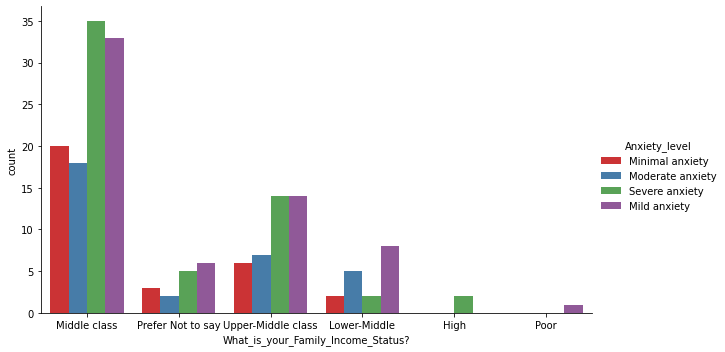

In [ ]:
sns.catplot(x="What_is_your_Family_Income_Status?", hue="Anxiety_level",
            kind="count", data=df_final, palette="Set1")

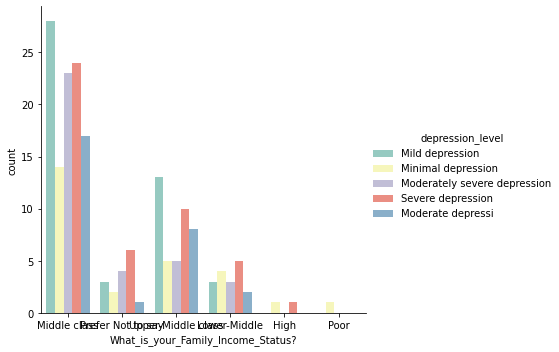

In [ ]:
sns.catplot(x="What_is_your_Family_Income_Status?", hue="depression_level",
            kind="count", data=df_final, palette="Set3", aspect = 1.1)

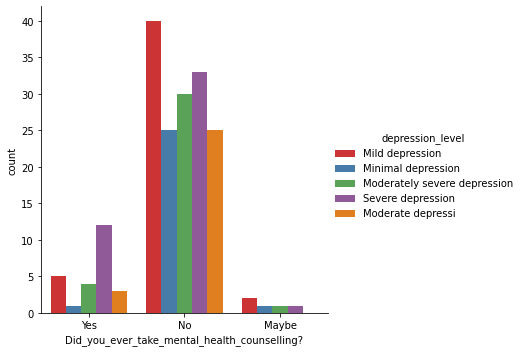

In [ ]:
sns.catplot(x="Did_you_ever_take_mental_health_counselling?", hue="depression_level",
            kind="count", data=df_final, palette="Set1")

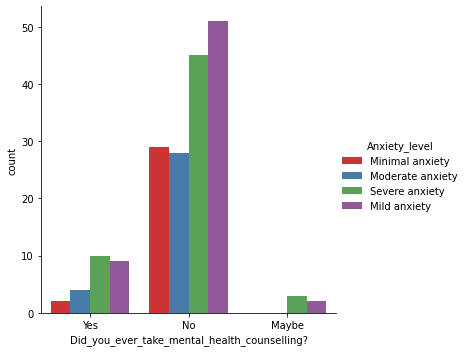

In [ ]:
sns.catplot(x="Did_you_ever_take_mental_health_counselling?", hue="Anxiety_level",
            kind="count", data=df_final, palette="Set1")

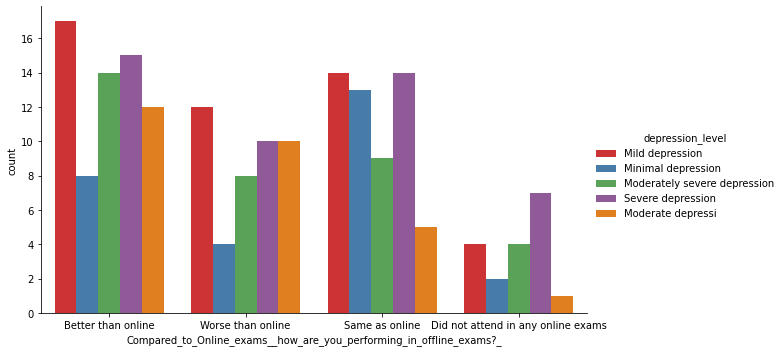

In [ ]:
sns.catplot(x="Compared_to_Online_exams__how_are_you_performing_in_offline_exams?_", hue="depression_level",
            kind="count", data=df_final, palette="Set1",  aspect=1.7)

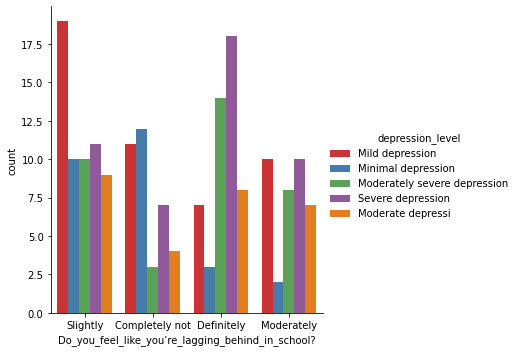

In [ ]:
sns.catplot(x="Do_you_feel_like_you’re_lagging_behind_in_school?", hue="depression_level",
            kind="count", data=df_final, palette="Set1")

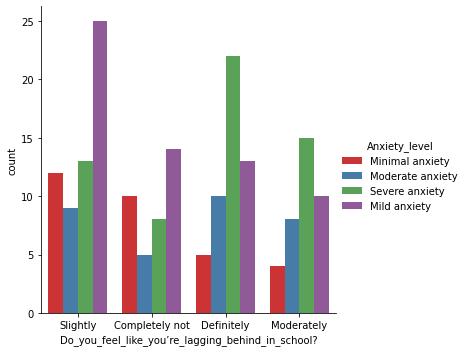

In [ ]:
sns.catplot(x="Do_you_feel_like_you’re_lagging_behind_in_school?", hue="Anxiety_level",
            kind="count", data=df_final, palette="Set1")

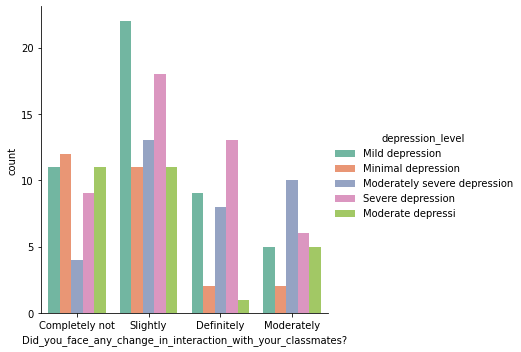

In [ ]:
sns.catplot(x="Did_you_face_any_change_in_interaction_with_your_classmates?", hue="depression_level",
            kind="count", data=df_final, palette="Set2")

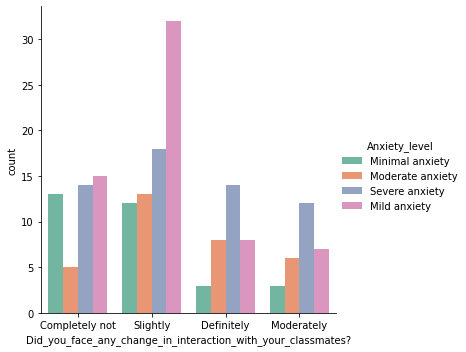

In [ ]:
sns.catplot(x="Did_you_face_any_change_in_interaction_with_your_classmates?", hue="Anxiety_level",
            kind="count", data=df_final, palette="Set2")

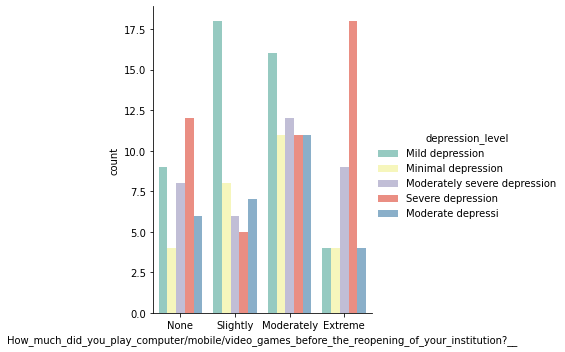

In [ ]:

sns.catplot(x="How_much_did_you_play_computer/mobile/video_games_before_the_reopening_of_your_institution?__", hue="depression_level",
            kind="count", data=df_final, palette="Set3", aspect=1.05)

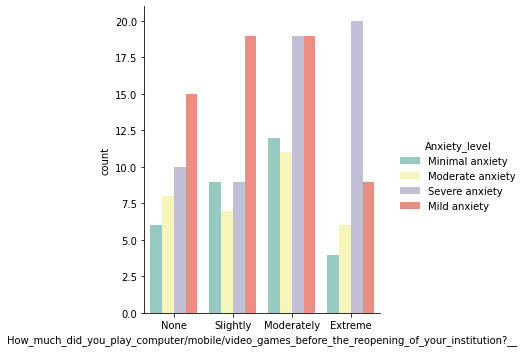

In [ ]:
sns.catplot(x="How_much_did_you_play_computer/mobile/video_games_before_the_reopening_of_your_institution?__", hue="Anxiety_level",
            kind="count", data=df_final, palette="Set3", aspect=1.05)

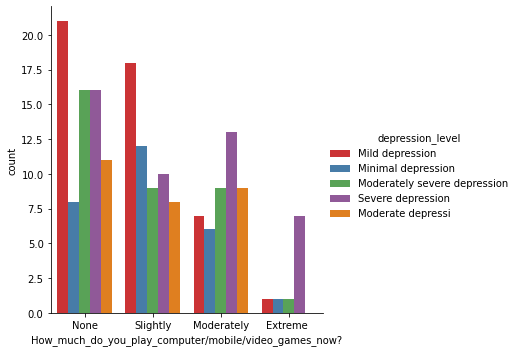

In [ ]:
sns.catplot(x="How_much_do_you_play_computer/mobile/video_games_now?", hue="depression_level",
            kind="count", data=df_final, palette="Set1", aspect=1)

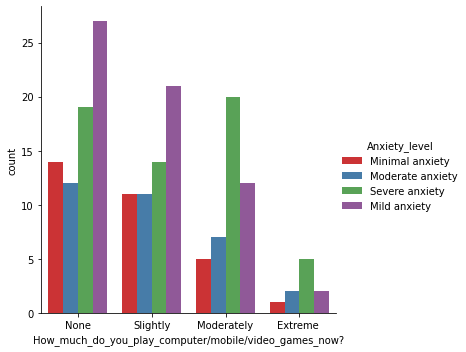

In [ ]:
sns.catplot(x="How_much_do_you_play_computer/mobile/video_games_now?", hue="Anxiety_level",
            kind="count", data=df_final, palette="Set1", aspect=1)

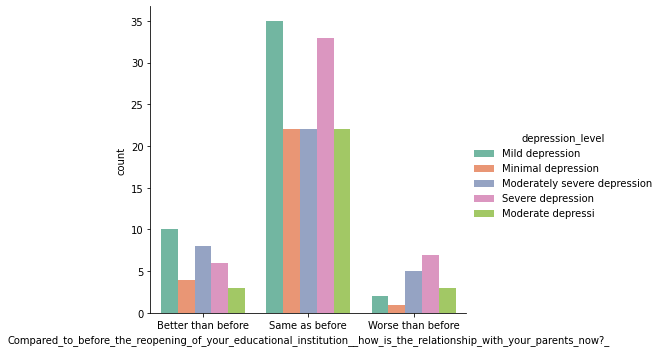

In [ ]:

sns.catplot(x="Compared_to_before_the_reopening_of_your_educational_institution__how_is_the_relationship_with_your_parents_now?_", hue="depression_level",
            kind="count", data=df_final, palette="Set2", aspect=1.3)

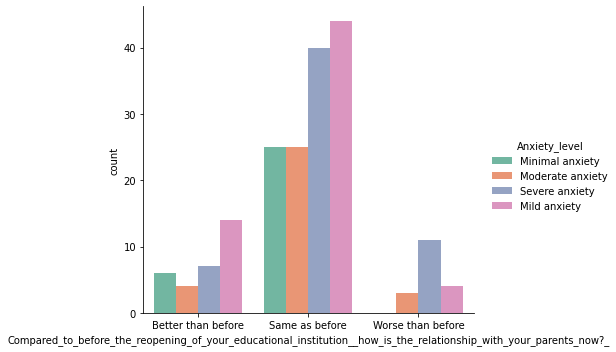

In [ ]:
sns.catplot(x="Compared_to_before_the_reopening_of_your_educational_institution__how_is_the_relationship_with_your_parents_now?_", hue="Anxiety_level",
            kind="count", data=df_final, palette="Set2", aspect=1.3)

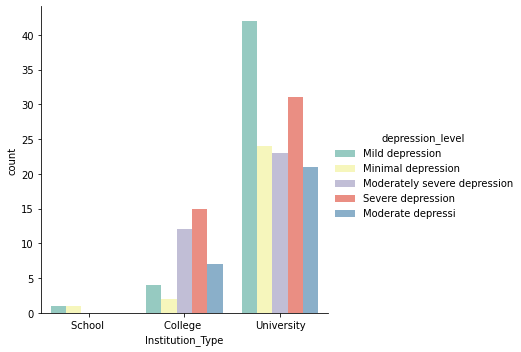

In [ ]:

sns.catplot(x="Institution_Type", hue="depression_level",
            kind="count", data=df_final, palette="Set3")

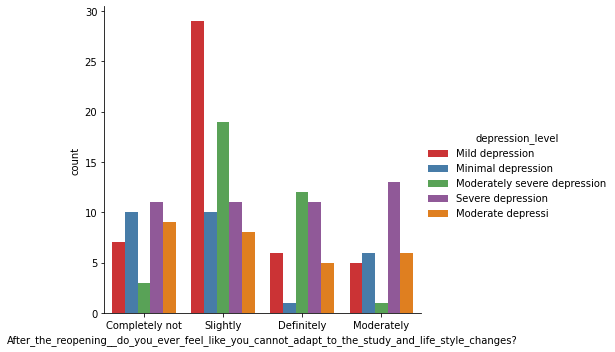

In [ ]:

sns.catplot(x='After_the_reopening__do_you_ever_feel_like_you_cannot_adapt_to_the_study_and_life_style_changes?', hue="depression_level",
            kind="count", data=df_final, palette="Set1", aspect=1.2)

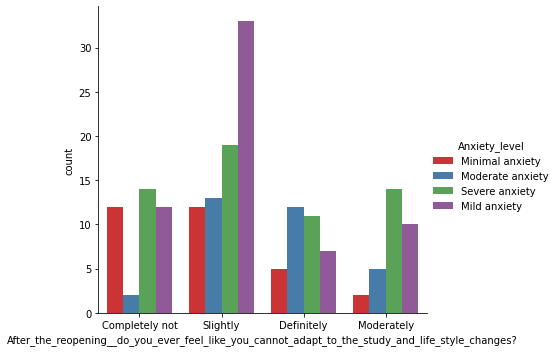

In [ ]:

sns.catplot(x='After_the_reopening__do_you_ever_feel_like_you_cannot_adapt_to_the_study_and_life_style_changes?', hue="Anxiety_level",
            kind="count", data=df_final, palette="Set1", aspect=1.2)

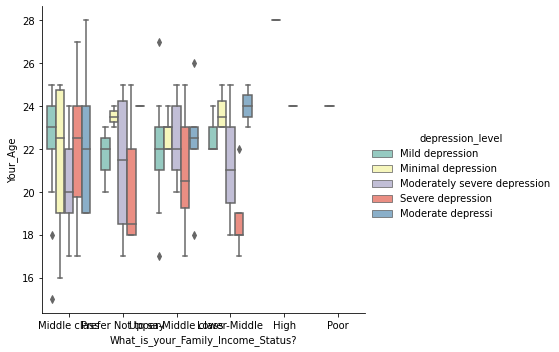

In [ ]:
sns.catplot(x="What_is_your_Family_Income_Status?", y="Your_Age", hue="depression_level",
            kind="box",  data=df_final, palette="Set3", aspect = 1.1 )

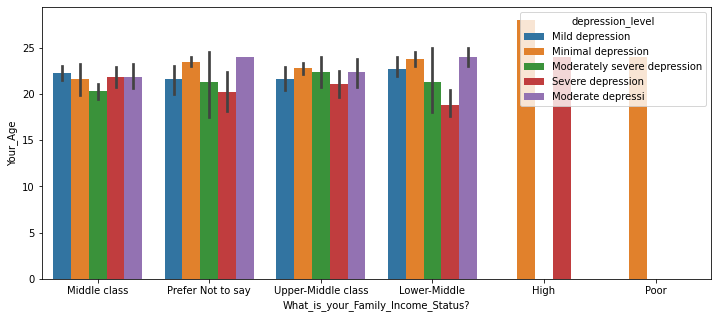

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.barplot(x="What_is_your_Family_Income_Status?", y="Your_Age", hue="depression_level", data=df_final)

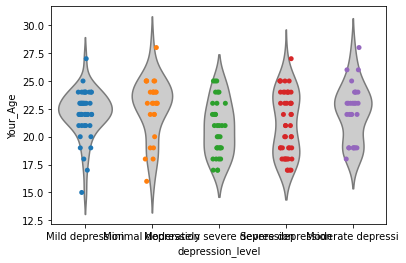

In [ ]:
ax = sns.violinplot(x="depression_level", y="Your_Age", data=df_final, inner=None, color=".8")
ax = sns.stripplot(x="depression_level", y="Your_Age", data=df_final)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


<Figure size 360x288 with 0 Axes>

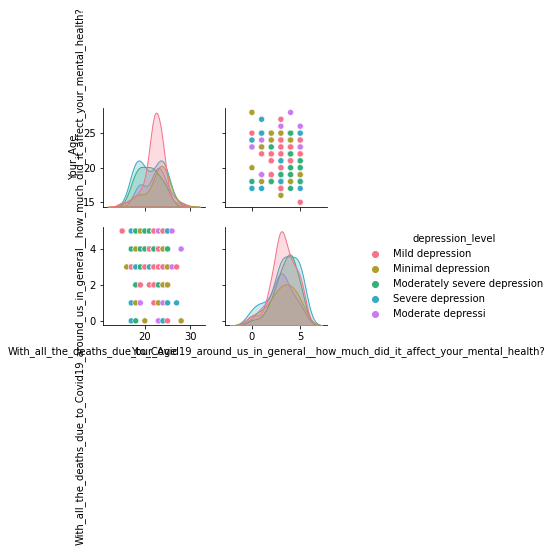

In [ ]:
# By Vaccine Acceptance Type
plt.figure(figsize=(5,4))
sns.pairplot(df_final,hue = 'depression_level',diag_kind = "kde",kind = "scatter",palette = "husl",height= 2)
plt.show()